# Johanes Paulus Bernard Purek - 225150407111090

## **Import Package**

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

## **Import Data**

In [172]:
url = "https://raw.githubusercontent.com/johanbernardd/Intern-DS-BCC-2024/main/shopping_behavior_updated.csv"

df = pd.read_csv(url, delimiter = ",")
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
0                Yes                  14          Venmo            Fortnightly  
1                Yes                   2           Cash            Fortnightly  
2                Yes                  23    Credit Card                 Weekly  
3                Yes                  49         PayPal                 Weekly  
4                Yes                  31         PayPal               Annually  
...              ...                 ...            ...                    ...  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly  

[3900 rows x 18 columns]

## **Data Interpretation**

**About Dataset**

> Context:
The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction. This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

**Dataset Glossary (Column-wise)**

> `Customer ID`: A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

> `Age`: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

> `Gender`: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

> `Item Purchased`: The specific product or item selected by the customer during the transaction.

> `Category`: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

> `Purchase Amount (USD)`: The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

> `Location`: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

> `Size`: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

> `Color`: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

> `Season`: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

> `Review Rating`: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

> `Subscription Status`: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

> `Shipping Type`: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

> `Discount Applied`: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

> `Promo Code Used`: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

> `Previous Purchases`: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

> `Payment Method`: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

> `Frequency of Purchases`: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

In [173]:
df.head(10)

Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   
5        Wyoming    M      White  Summer            2.9                 Yes   
6        Montana    M       Gray    Fall            3.2                 Yes   
7      Louisiana    L   Charcoal  Winter            3.2                 Yes   
8  West Virginia    L     Silver  Summer            2.6                 Yes   
9       Missouri    M       Pink  Spring            4.8                 Yes   

    Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0         Express              Yes             Yes                  14   
1         Express              Yes             Yes                   2   
2   Free Shipping              Yes             Yes                  23   
3    Next Day Air              Yes             Yes                  49   
4   Free Shipping              Yes             Yes                  31   
5        Standard              Yes             Yes                  14   
6   Free Shipping              Yes             Yes                  49   
7   Free Shipping              Yes             Yes                  19   
8         Express              Yes             Yes                   8   
9  2-Day Shipping              Yes             Yes                   4   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually  
5          Venmo                 Weekly  
6           Cash              Quarterly  
7    Credit Card                 Weekly  
8          Venmo               Annually  
9           Cash              Quarterly

In [174]:
df.sample(10)

Customer ID  Age  Gender Item Purchased     Category  \
588           589   47    Male          Boots     Footwear   
2306         2307   27    Male         Gloves  Accessories   
2856         2857   65  Female         Jacket    Outerwear   
2338         2339   66    Male       Sneakers     Footwear   
3755         3756   64  Female          Skirt     Clothing   
803           804   32    Male         Shorts     Clothing   
50             51   49    Male         Blouse     Clothing   
1282         1283   24    Male          Shirt     Clothing   
1380         1381   51    Male       Sneakers     Footwear   
898           899   54    Male           Belt  Accessories   

      Purchase Amount (USD)       Location Size   Color  Season  \
588                      60   South Dakota    M  Violet    Fall   
2306                     78        Florida    L  Silver  Winter   
2856                     48           Iowa    M  Indigo  Winter   
2338                     68        Georgia    S  Silver    Fall   
3755                     93   Pennsylvania    M   Peach    Fall   
803                      38    Connecticut    L  Silver  Winter   
50                       28       Maryland    M     Red  Spring   
1282                     68  New Hampshire    L  Violet  Winter   
1380                     35  Massachusetts    S   Beige  Winter   
898                      70         Nevada    L     Red  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
588             3.0                 Yes        Standard              Yes   
2306            3.4                  No        Standard               No   
2856            3.5                  No  2-Day Shipping               No   
2338            4.0                  No         Express               No   
3755            3.4                  No   Free Shipping               No   
803             2.8                 Yes         Express              Yes   
50              3.7                 Yes    Store Pickup              Yes   
1282            3.0                  No   Free Shipping              Yes   
1380            4.6                  No        Standard              Yes   
898             3.5                 Yes  2-Day Shipping              Yes   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
588              Yes                   9     Debit Card              Quarterly  
2306              No                   8           Cash              Bi-Weekly  
2856              No                  31    Credit Card                Monthly  
2338              No                  21         PayPal              Quarterly  
3755              No                  26    Credit Card                Monthly  
803              Yes                  30          Venmo         Every 3 Months  
50               Yes                  39     Debit Card              Bi-Weekly  
1282             Yes                  20          Venmo                Monthly  
1380             Yes                  41           Cash            Fortnightly  
898              Yes                  19  Bank Transfer         Every 3 Months

In [175]:
df.shape

(3900, 18)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [177]:
df.describe().T

count         mean          std   min     25%     50%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Previous Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase Amount (USD)    81.00   100.0  
Review Rating             4.40     5.0  
Previous Purchases       38.00    50.0

In [178]:
numerical_col = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_col = df.select_dtypes(include = ['object']).columns

print(f"Numerical Column: {numerical_col}")
print('=========================================================================')
print(f"Categorical Column: {categorical_col}")

Numerical Column: Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')
Categorical Column: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [179]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [180]:
df.duplicated().sum()

0

In [181]:
max_review_rating = df['Review Rating'].max()
max_review_rating

# from 2.5 to 5

5.0

In [182]:
max_previous_purchases = df['Previous Purchases'].max()
max_previous_purchases

# from 1 to 50

50

In [183]:
# Grouping Region
regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mideast': ['Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'Plains': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Southeast': ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Rocky Mountain': ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
    'Far West': ['Alaska', 'California', 'Hawaii', 'Nevada', 'Oregon', 'Washington']
}

In [184]:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

In [185]:
df['Region'] = df['Location'].apply(get_region)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases       Region  
0          Venmo            Fortnightly    Southeast  
1           Cash            Fortnightly  New England  
2    Credit Card                 Weekly  New England  
3         PayPal                 Weekly  New England  
4         PayPal               Annually     Far West

In [186]:
df["Region"].value_counts()

Southeast         947
Plains            541
Far West          466
New England       446
Rocky Mountain    406
Mideast           400
Great Lakes       396
Southwest         298
Name: Region, dtype: int64

## **Value Count Analysis**

In [187]:
def show_value_count(data, label):
  value_count = data[label].value_counts()

  print(f"\nPersebaran dari kolom {label}: \n{value_count}")

In [188]:
column_types = df.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Region']

In [189]:
integer_columns = column_types[column_types == 'int64'].index.tolist()
integer_columns

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Previous Purchases']

In [190]:
float_columns = column_types[column_types == 'float64'].index.tolist()
float_columns

['Review Rating']

In [191]:
for column in object_columns:
  show_value_count(df, column)


Persebaran dari kolom Gender: 
Male      2652
Female    1248
Name: Gender, dtype: int64

Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

Persebaran dari kolom Category: 
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

Persebaran dari kolom Location: 
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86

In [192]:
for column in float_columns:
  show_value_count(df, column)


Persebaran dari kolom Review Rating: 
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review Rating, dtype: int64


In [193]:
for column in integer_columns:
  show_value_count(df, column)


Persebaran dari kolom Customer ID: 
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64

Persebaran dari kolom Age: 
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

Persebaran dari kolom Purchase Amount (USD): 
94     62
32     62
36     62
51     61
90     60
       ..
100    36
87     35
49     35
69     34
61     33
Name: Purchase Amount (USD), Length: 81, dtype: int64

Persebaran dari kolom Previous Purchases: 
31    97
21    96
14  

# **Classify Age**

In [194]:
def classify_age_group(age):
    if age <= 19:
        return 'Teenage'
    elif 20 <= age <= 30:
        return 'Younger_Adult'
    elif 31 <= age <= 44:
        return 'Middle_Adult'
    elif 45 <= age <= 59:
        return 'Adult'
    else:
      return 'Elder'

df['Age_group'] = df['Age'].apply(classify_age_group)

In [195]:
def classify_birth_year_group(age):
  birth_year = 2024 - age
  if birth_year >= 2013:
      return 'Gen Alpha'
  elif 1995 <= birth_year <= 2012:
      return 'Gen Z'
  elif 1980 <= birth_year <= 1994:
      return 'Millenials'
  elif 1965 <= birth_year <= 1979:
      return 'Gen X'
  else:
      return 'Baby Boomer'

df['Generation'] = df['Age'].apply(classify_birth_year_group)

In [196]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Subscription Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

   Shipping Type Discount Applied Promo Code Used Previous Purchases  \
0        Express              Yes             Yes                 14   
1        Express              Yes             Yes                  2   
2  Free Shipping              Yes             Yes                 23   
3   Next Day Air              Yes             Yes                 49   
4  Free Shipping              Yes             Yes                 31   

   Payment Method Frequency of Purchases       Region      Age_group  \
0           Venmo            Fortnightly    Southeast          Adult   
1            Cash            Fortnightly  New England        Teenage   
2     Credit Card                 Weekly  New England          Adult   
3          PayPal                 Weekly  New England  Younger_Adult   
4          PayPal               Annually     Far West          Adult   

  Generation  
0      Gen X  
1      Gen Z  
2      Gen X  
3      Gen Z  
4      Gen X  

[5 rows x 21 columns]

# **Classify Region**

In [197]:
regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mideast': ['Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'Plains': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Southeast': ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Rocky Mountain': ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
    'Far West': ['Alaska', 'California', 'Hawaii', 'Nevada', 'Oregon', 'Washington']
}

In [198]:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

In [199]:
df['Region'] = df['Location'].apply(get_region)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Subscription Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

   Shipping Type Discount Applied Promo Code Used Previous Purchases  \
0        Express              Yes             Yes                 14   
1        Express              Yes             Yes                  2   
2  Free Shipping              Yes             Yes                 23   
3   Next Day Air              Yes             Yes                 49   
4  Free Shipping              Yes             Yes                 31   

   Payment Method Frequency of Purchases       Region      Age_group  \
0           Venmo            Fortnightly    Southeast          Adult   
1            Cash            Fortnightly  New England        Teenage   
2     Credit Card                 Weekly  New England          Adult   
3          PayPal                 Weekly  New England  Younger_Adult   
4          PayPal               Annually     Far West          Adult   

  Generation  
0      Gen X  
1      Gen Z  
2      Gen X  
3      Gen Z  
4      Gen X  

[5 rows x 21 columns]

In [200]:
df["Region"].value_counts()

Southeast         947
Plains            541
Far West          466
New England       446
Rocky Mountain    406
Mideast           400
Great Lakes       396
Southwest         298
Name: Region, dtype: int64

# Data Visualization (Heatmap)

<ipython-input-201-63e857dfd01d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


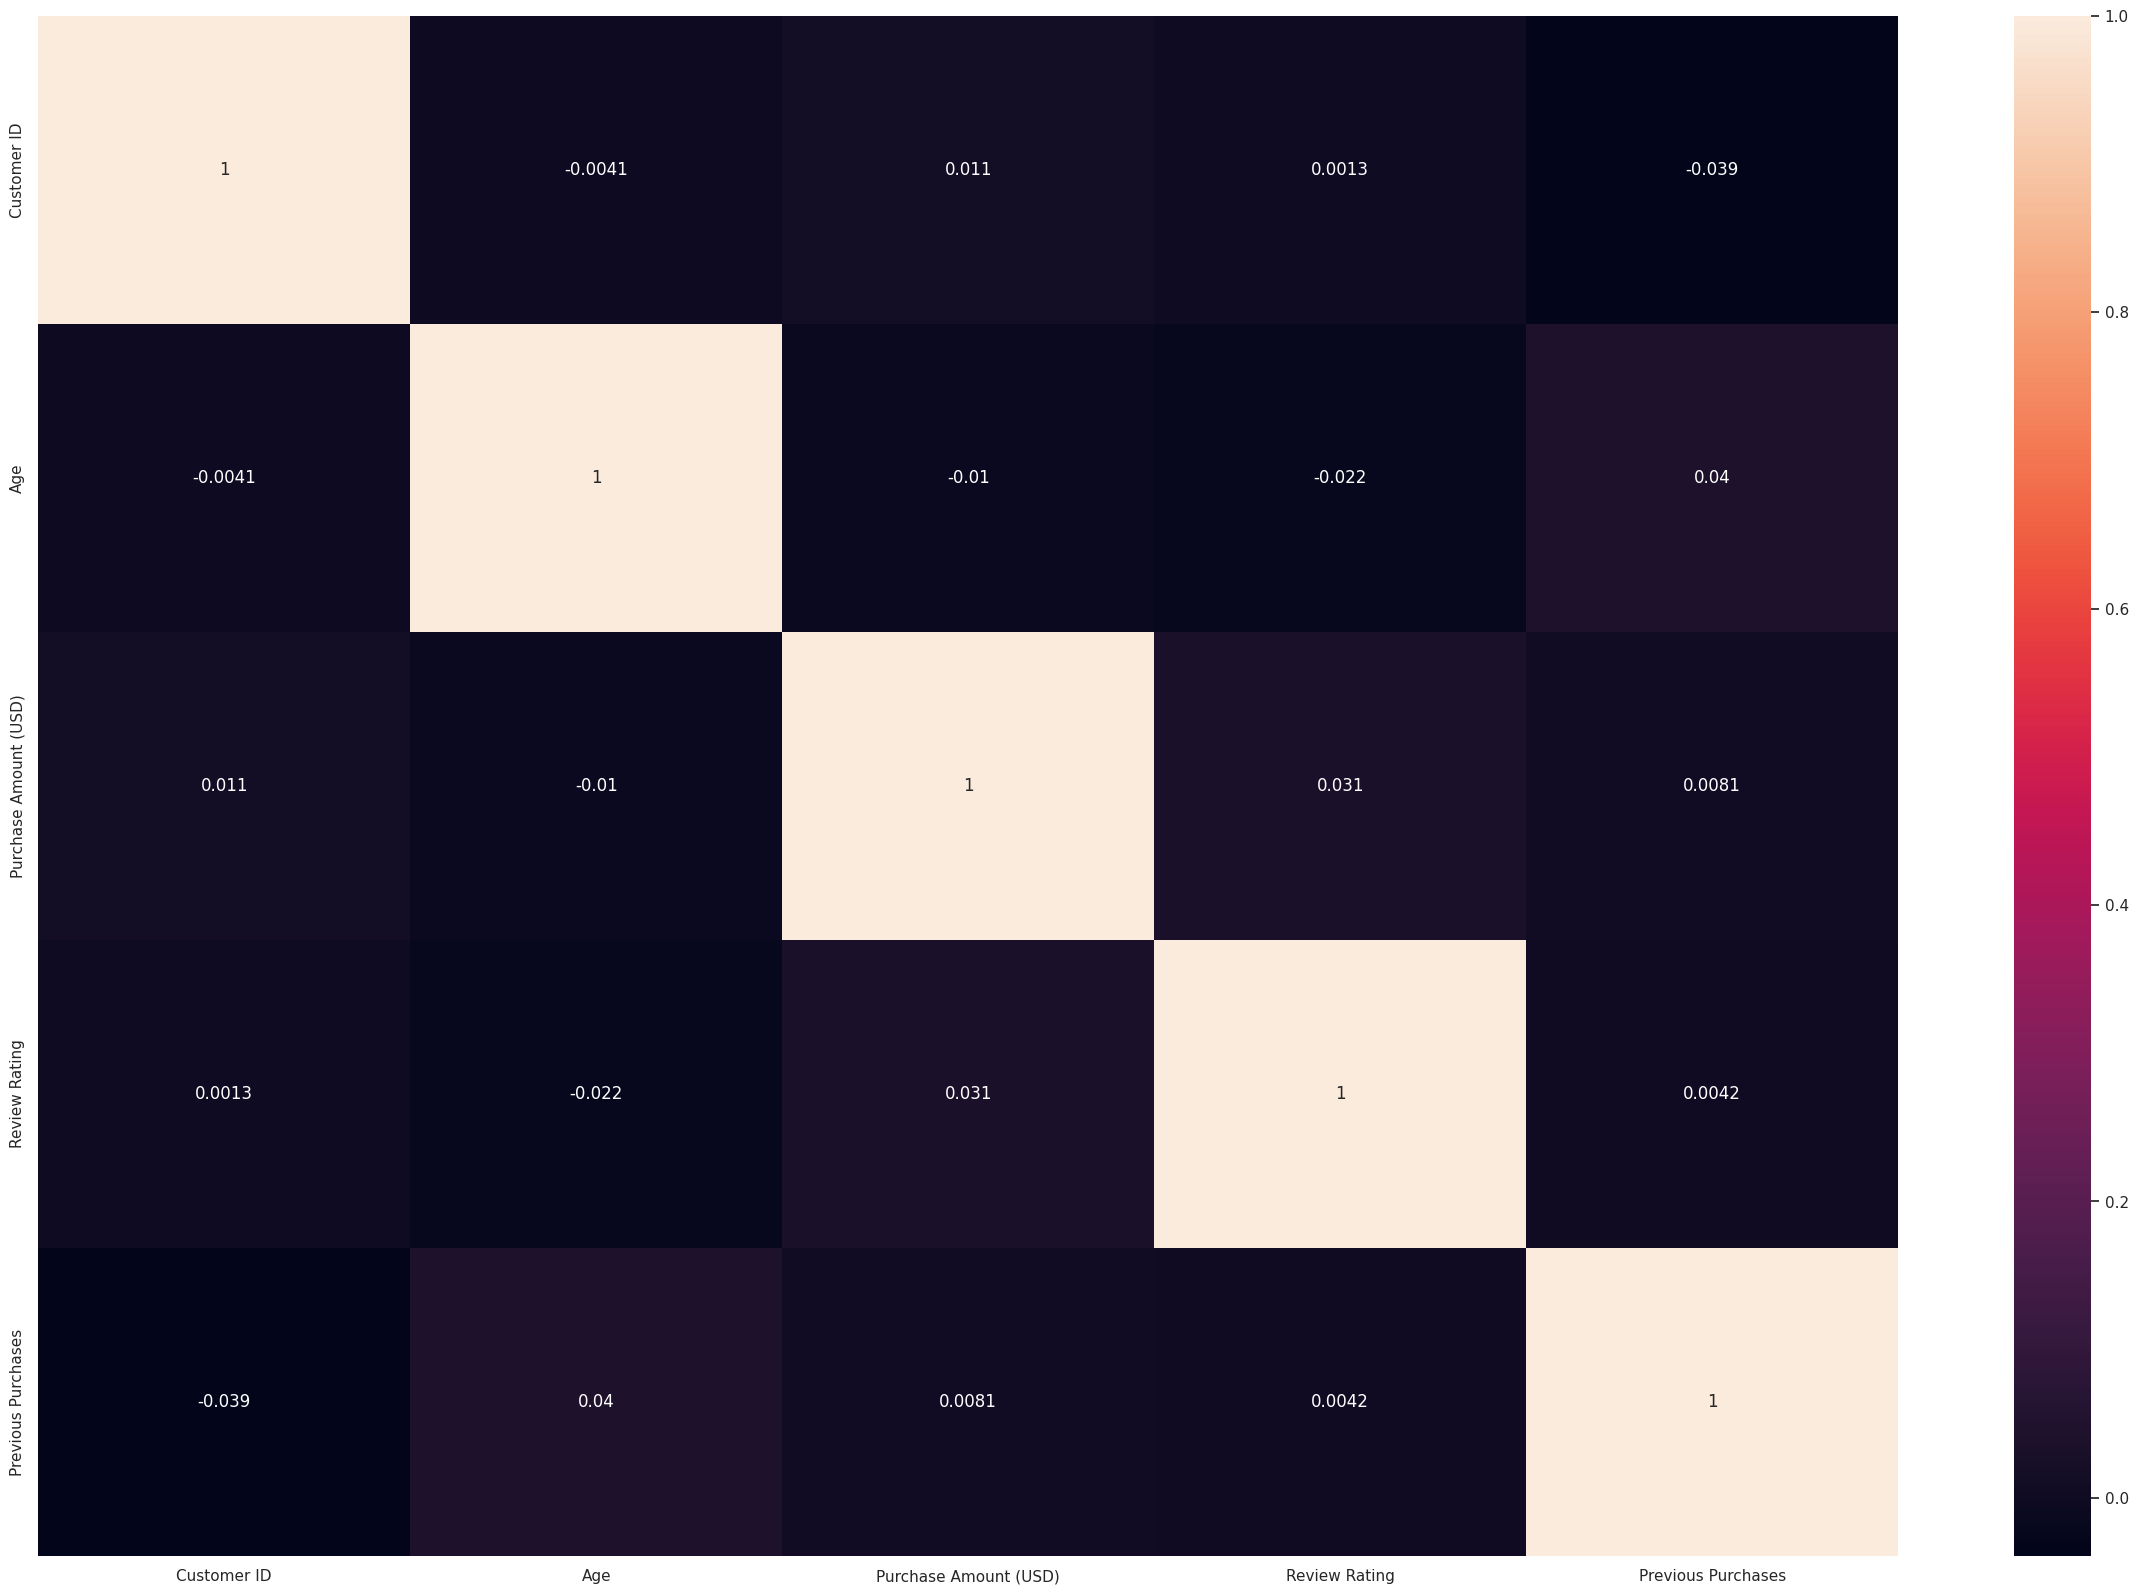

In [201]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [202]:
# df['Review Rating_Class'] = pd.qcut(df['Review Rating'], q=5, labels=[1, 2, 3, 4, 5])

# df['Previous Purchases_Class'] = pd.qcut(df['Previous Purchases'], q=5, labels=[10, 20, 30, 40, 50])

# contingency_table = pd.crosstab(df['Review Rating_Class'], df['Previous Purchases_Class'])

# sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")

# plt.show()

# Data Visualization (Scatter Plot)

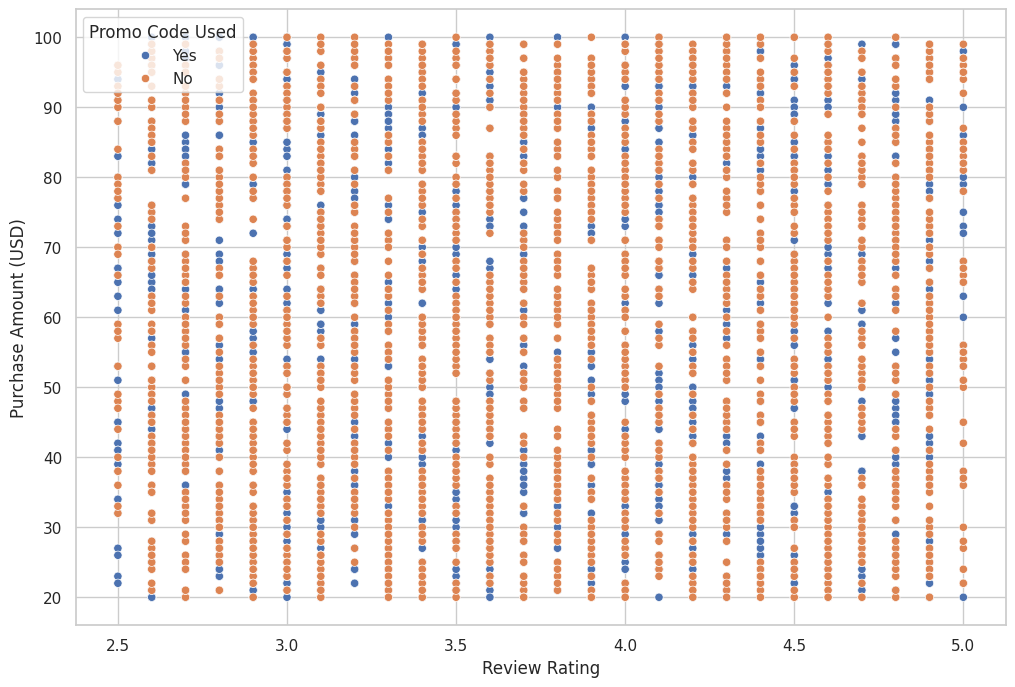

In [203]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Review Rating', y='Purchase Amount (USD)', hue='Promo Code Used')
plt.show()

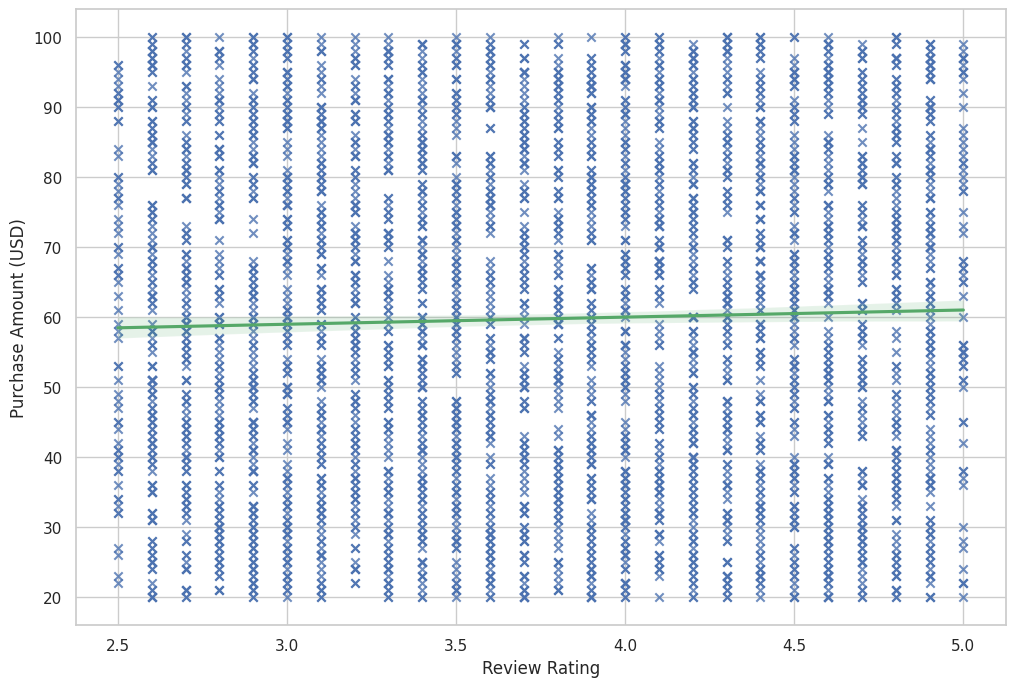

In [204]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x='Review Rating', y='Purchase Amount (USD)', marker='x', line_kws=dict(color='g'))
plt.show()

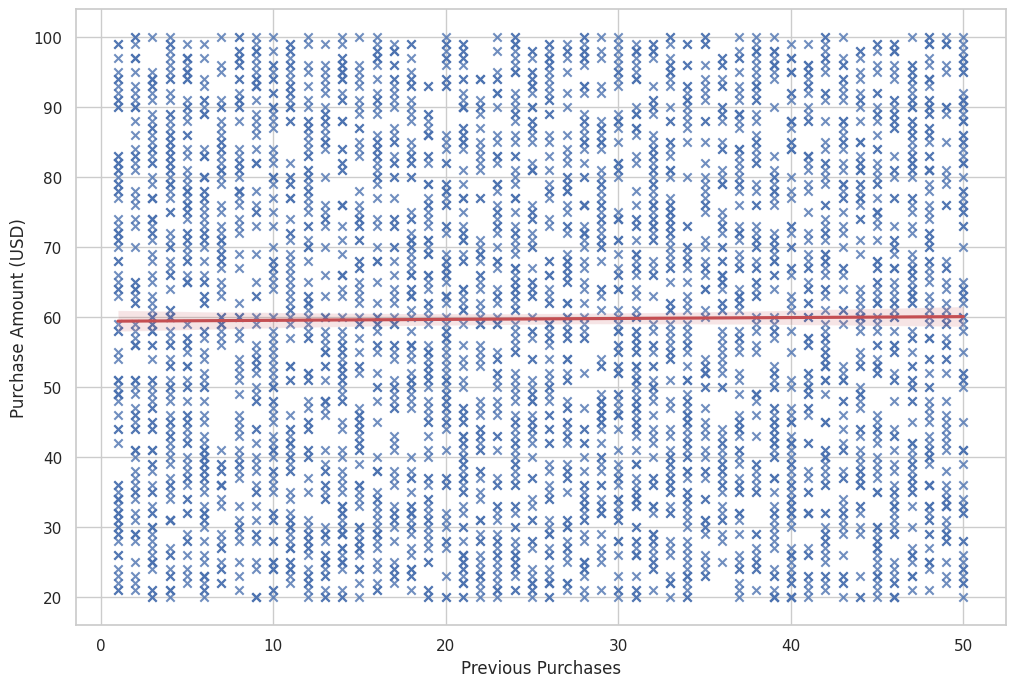

In [205]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x='Previous Purchases', y='Purchase Amount (USD)', marker='x', line_kws=dict(color='r'))
plt.show()

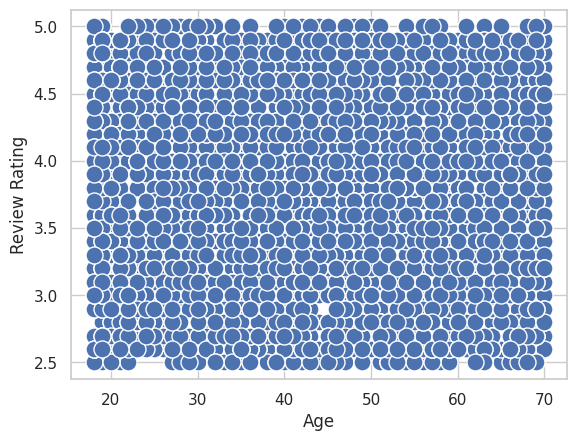

In [206]:
ax = sns.scatterplot(data = df,
                     x = 'Age',
                     y = 'Review Rating',
                     s = 150)

# Data Visualization (Histogram)

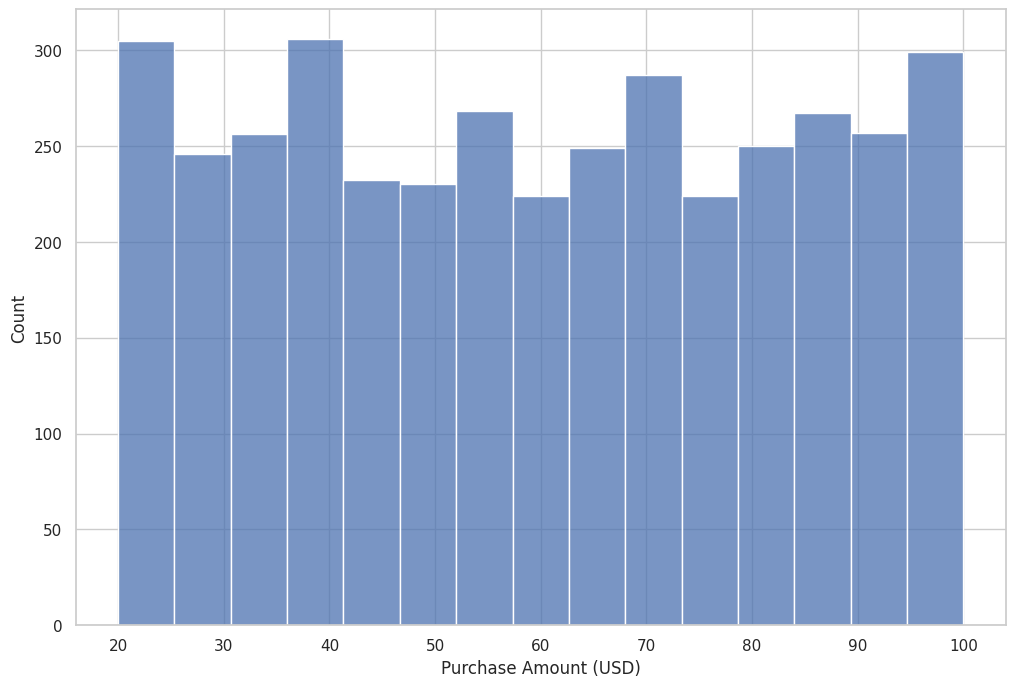

In [207]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df['Purchase Amount (USD)'], kde=False)
plt.show()

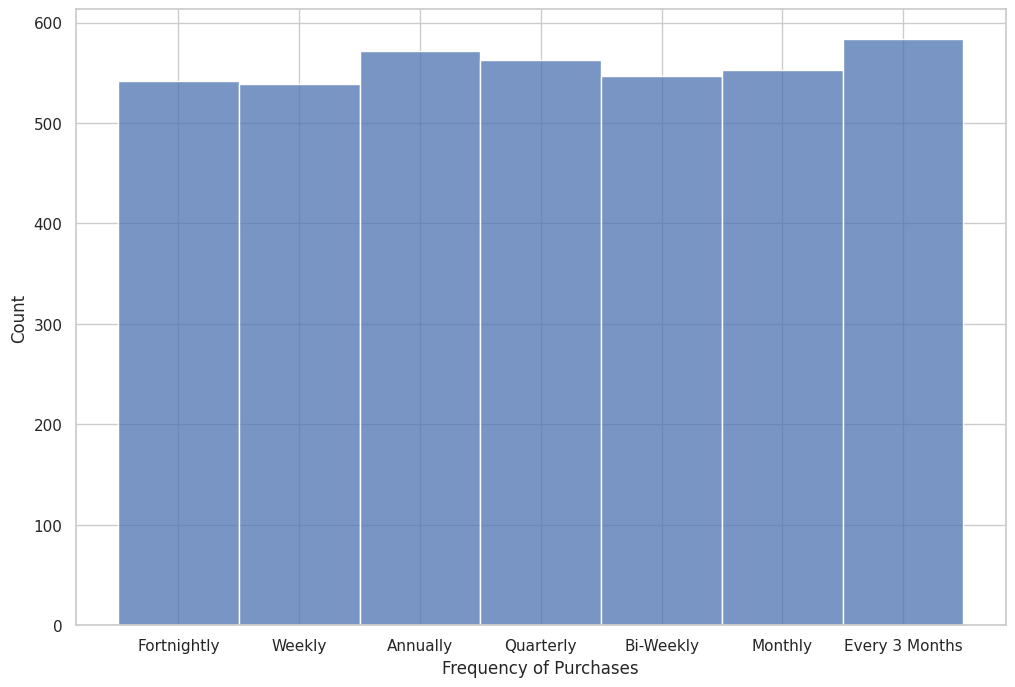

In [208]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df['Frequency of Purchases'], kde=False)
plt.show()

<ipython-input-209-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Review Rating'}>],
       [<Axes: title={'center': 'Previous Purchases'}>, <Axes: >]],
      dtype=object)

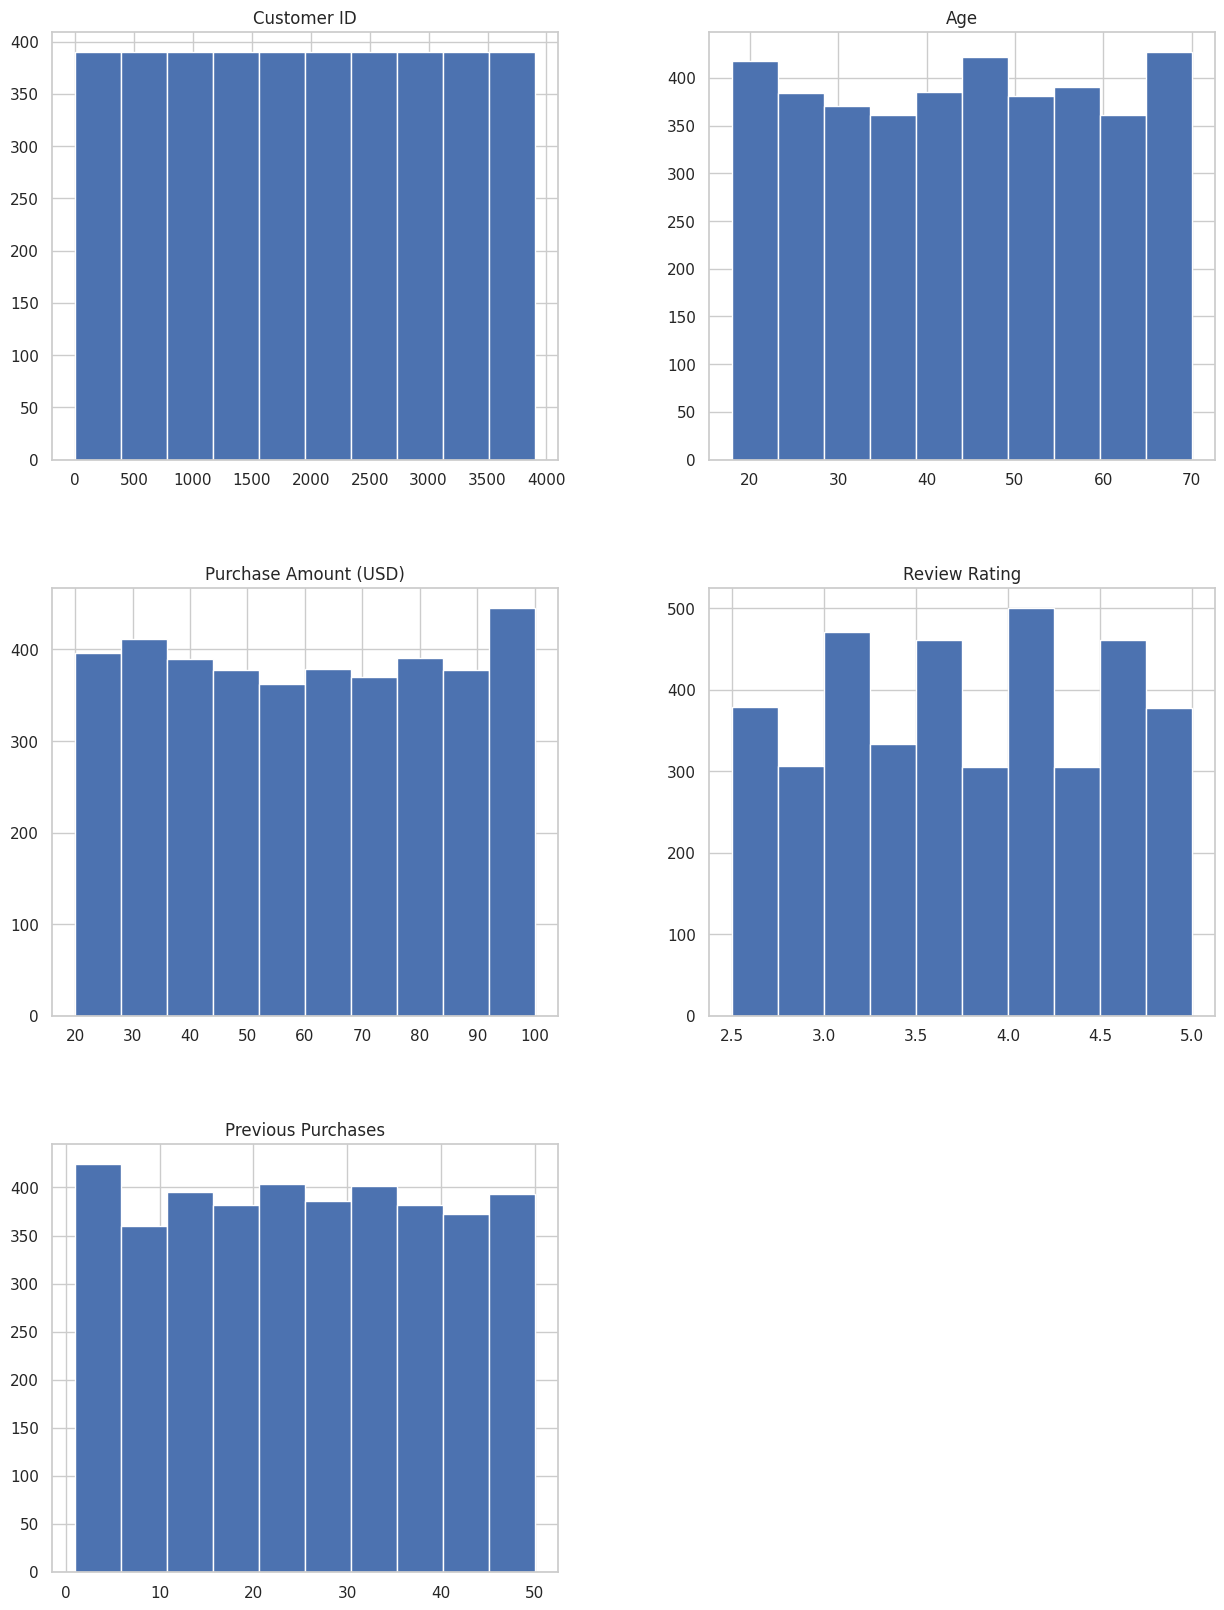

In [209]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<ipython-input-210-3dcaa1d56cbc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(current_labels, rotation=0)
<ipython-input-210-3dcaa1d56cbc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(current_labels, rotation=0)
<ipython-input-210-3dcaa1d56cbc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(current_labels, rotation=0)
<ipython-input-210-3dcaa1d56cbc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(current_labels, rotation=0)
<ipython-input-210-3dcaa1d56cbc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(current_labels, rotation=0)
<ipython-input-210-3dcaa1d56cbc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(current_labels, rota

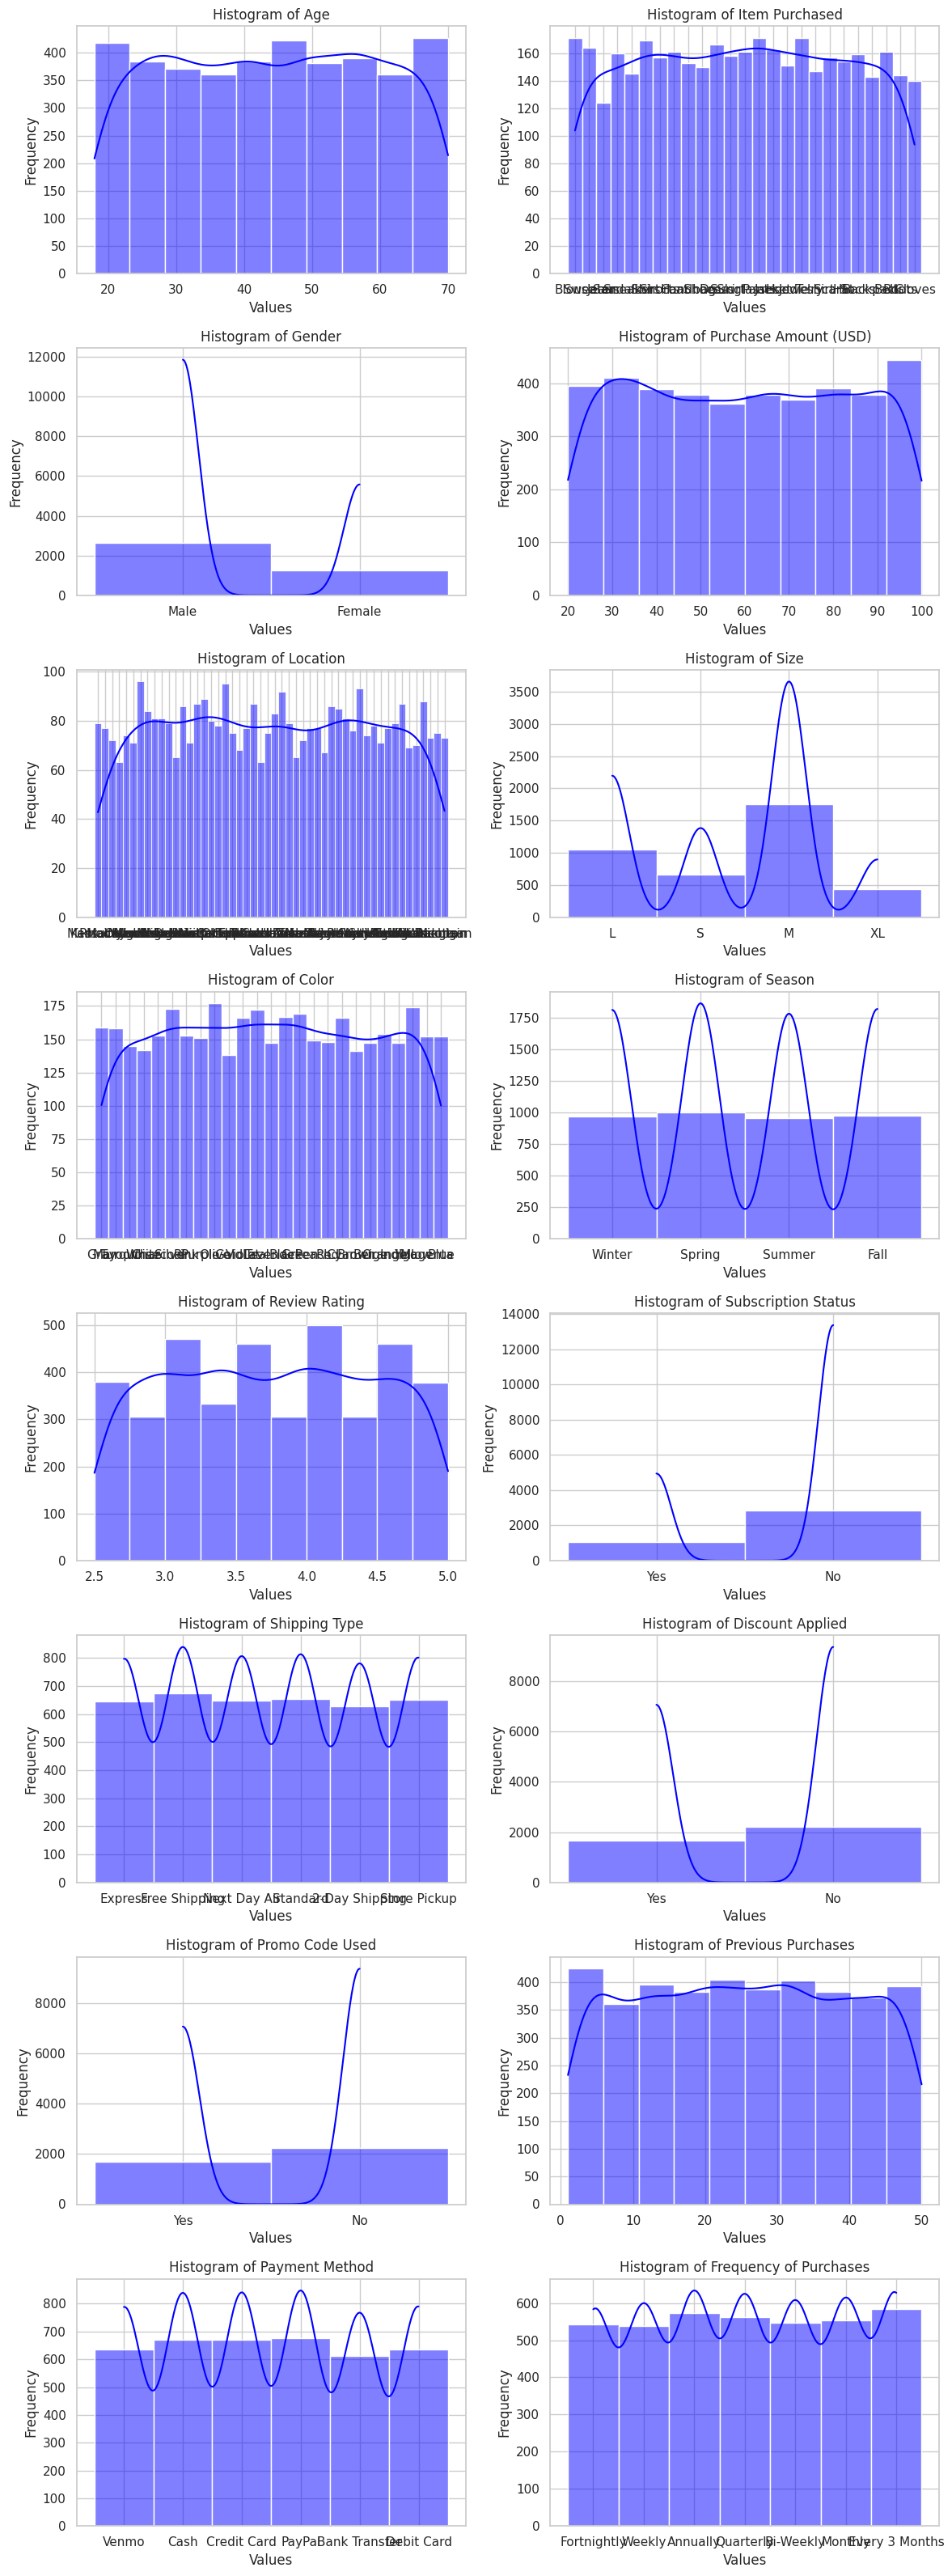

In [210]:
hist_feat_int = df[['Age', 'Item Purchased','Gender', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status','Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']]

n_features = len(hist_feat_int.columns)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

axes = axes.ravel()

for idx, feature in enumerate(hist_feat_int.columns):
    sns.histplot(hist_feat_int[feature], color='blue', bins=10, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel('Values')
    axes[idx].set_ylabel('Frequency')
    current_labels = axes[idx].get_xticklabels()
    axes[idx].set_xticklabels(current_labels, rotation=0)

plt.tight_layout()
plt.show()

# Data Visualization (Count Plot)

TypeError: 'str' object is not callable

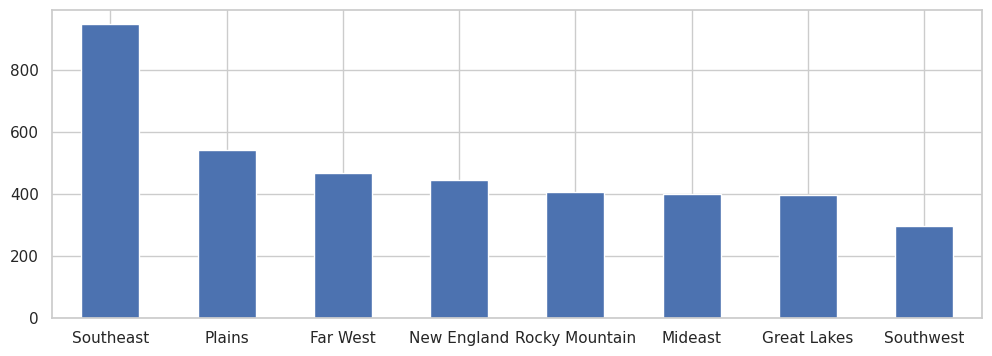

In [211]:
region_counts = df["Region"].value_counts()
region_counts.plot(kind="bar", figsize=(12, 4), rot=0)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

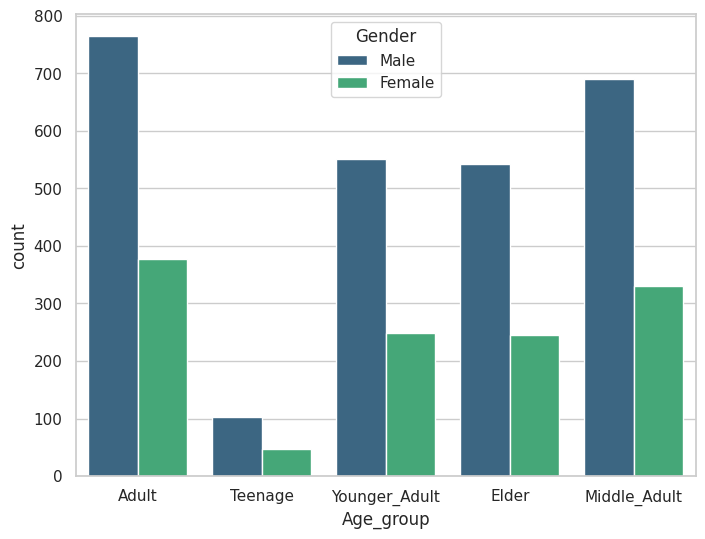

In [212]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_group', data=df, hue='Gender', palette='viridis')
plt.xlabel=('(Age Group)')
plt.title=('Total Customer by gender')
plt.show()

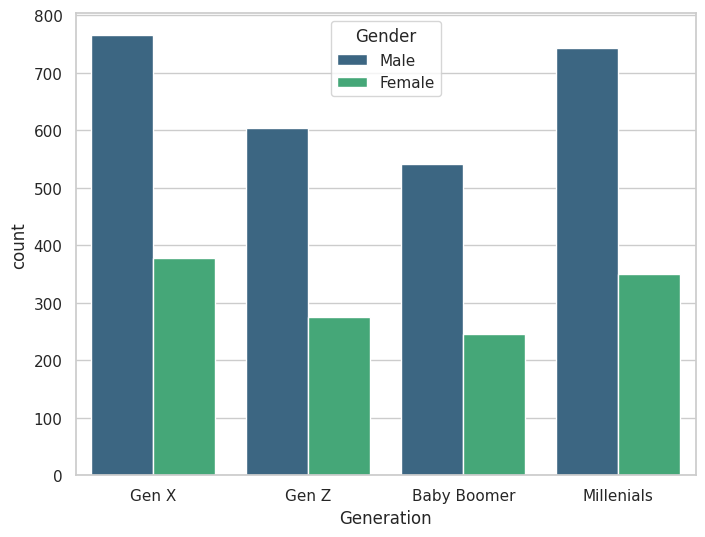

In [213]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Generation', data=df, hue='Gender', palette='viridis')
plt.xlabel=('(Generation)')
plt.title=('Total Customer by gender')
plt.show()

# Data Visualization (Density Plot (KDE))

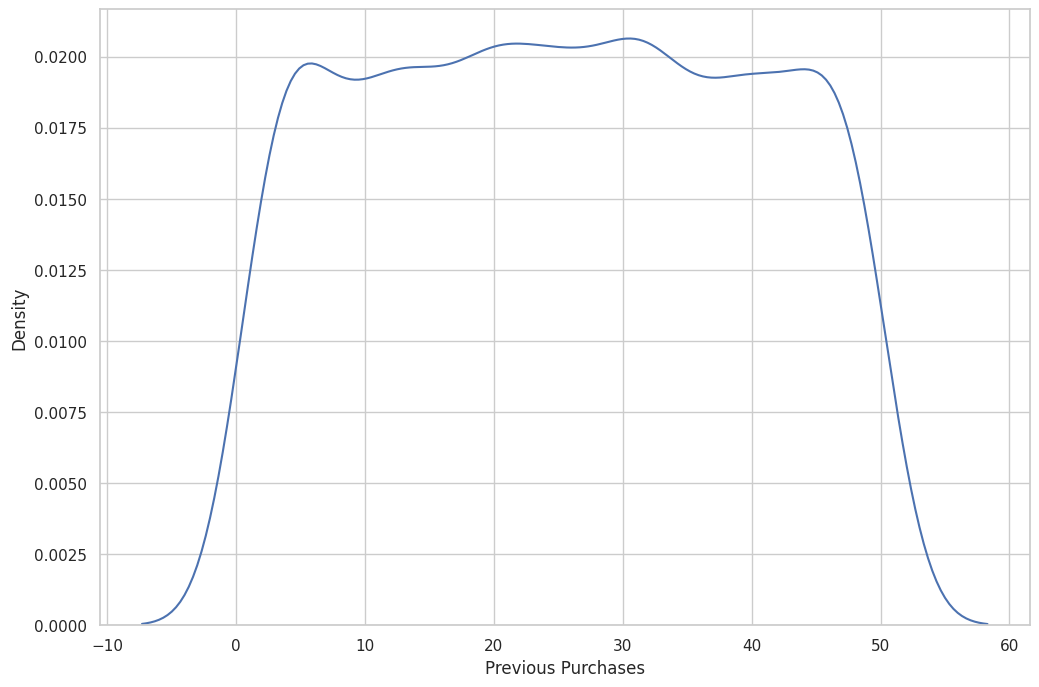

In [214]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df['Previous Purchases'])
plt.show()

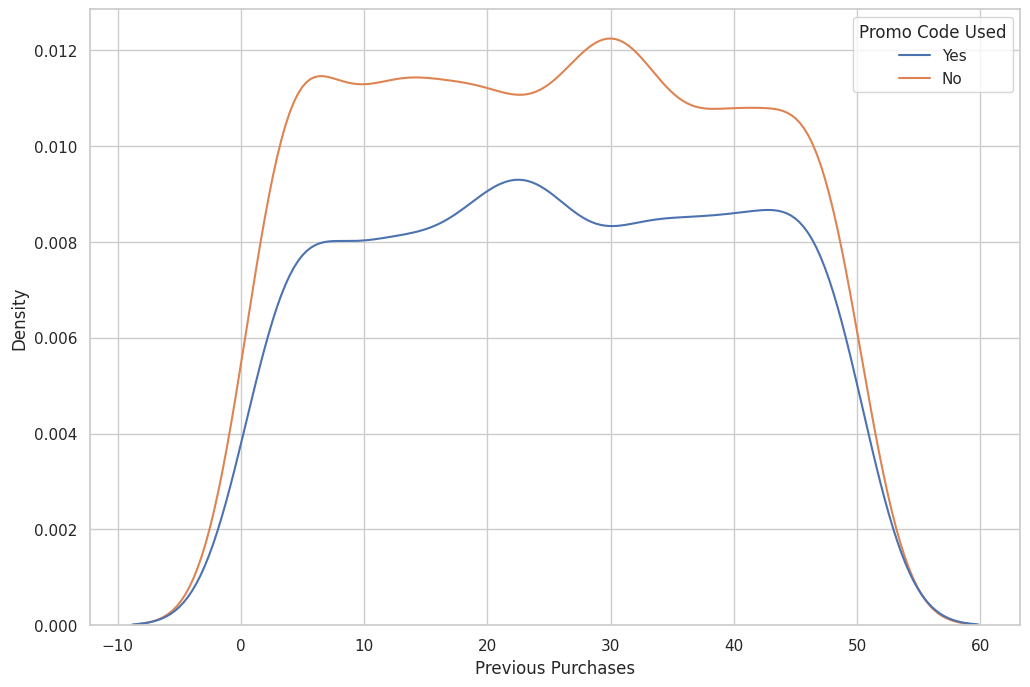

In [215]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Previous Purchases', hue='Promo Code Used')
plt.show()

In [216]:
# plt.figure(figsize=(12, 8))
# sns.kdeplot(data=df, x='Frequency of Purchases', hue='Discount Applied')
# plt.show()

# Data Visualization (Box Plot)

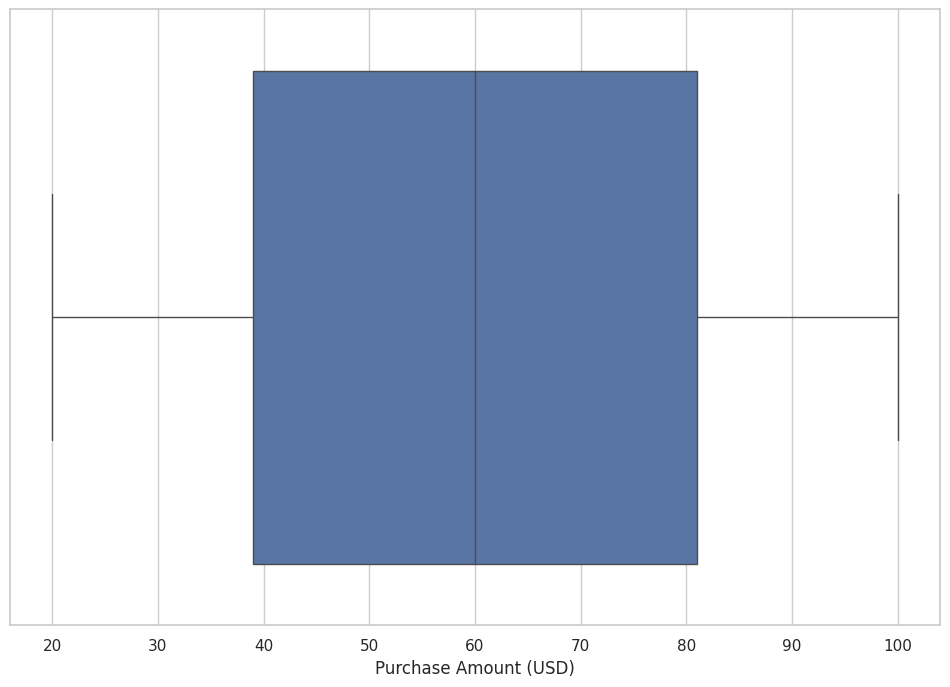

In [217]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.show()

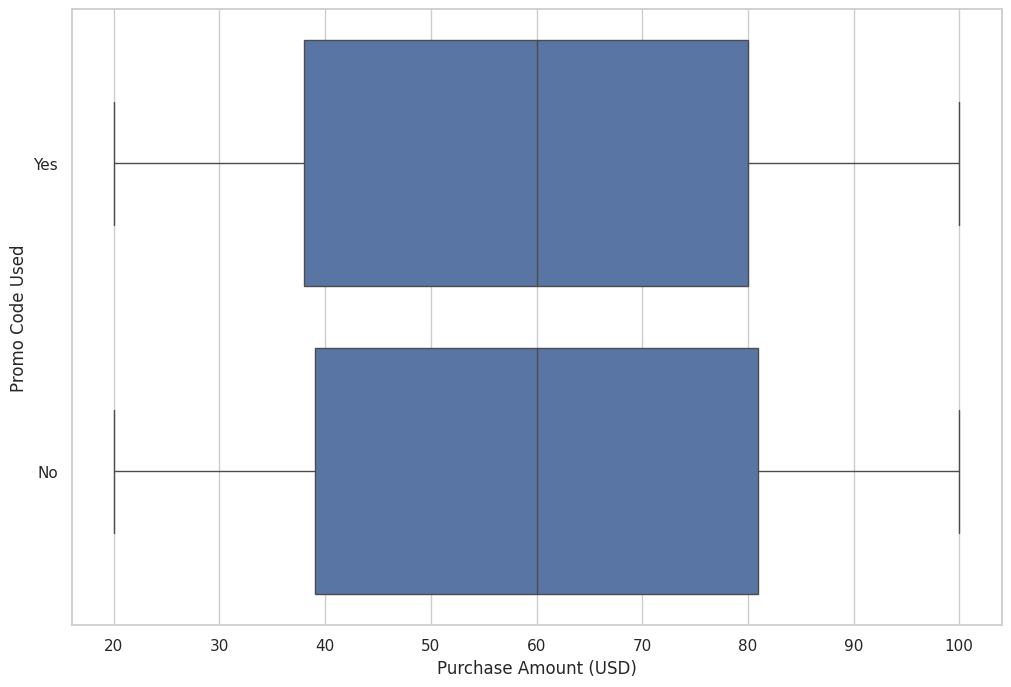

In [218]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Purchase Amount (USD)'], y=df['Promo Code Used'])
plt.show()

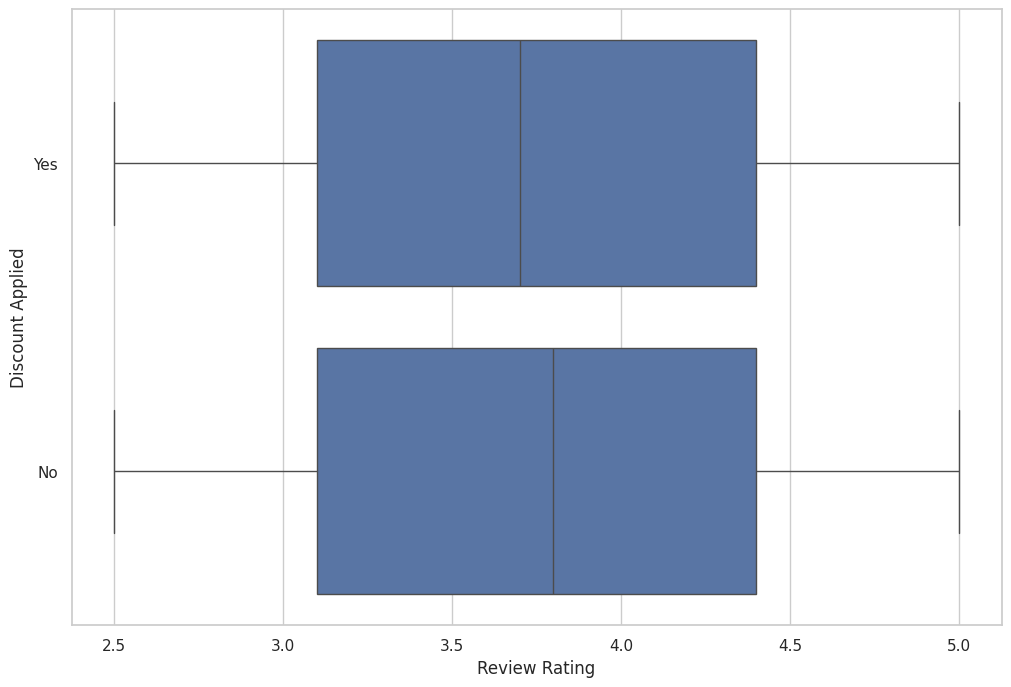

In [219]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Review Rating'], y=df['Discount Applied'])
plt.show()

<ipython-input-220-c7a2f34eedc5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = df,


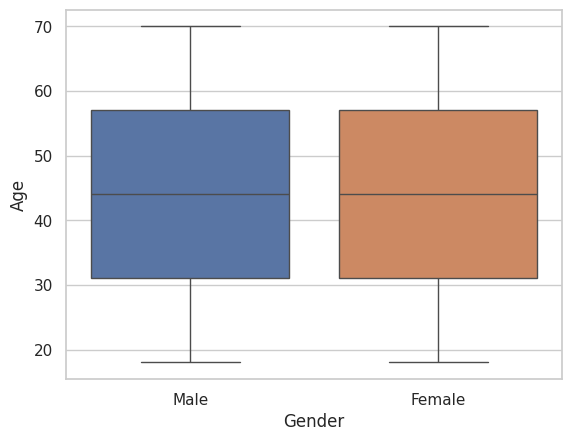

In [220]:
ax = sns.boxplot(data = df,
                 x = 'Gender',
                 y = 'Age',
                 palette = 'deep')

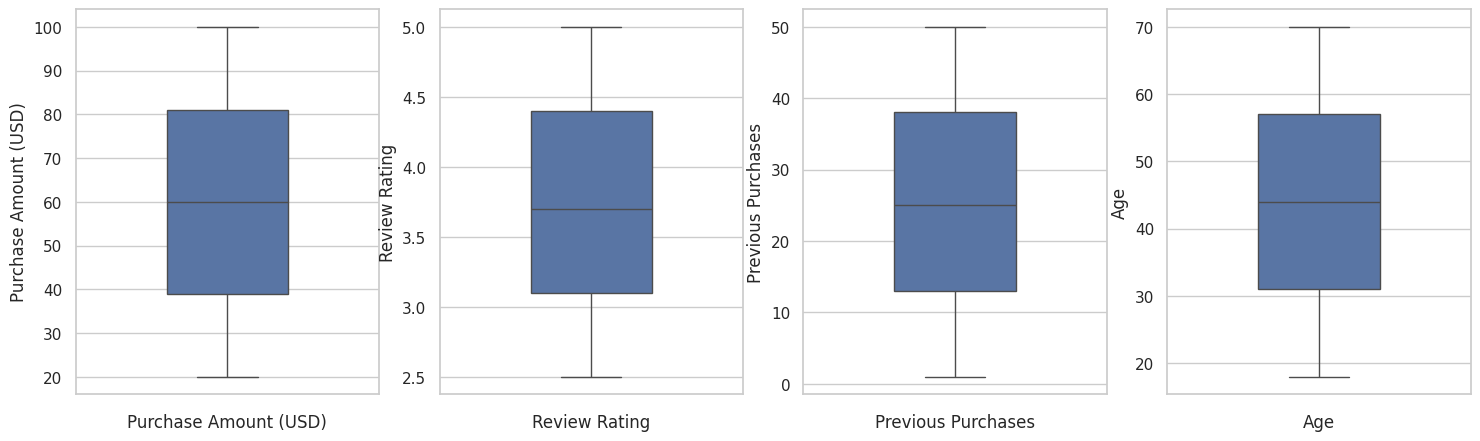

In [221]:
f, ax = plt.subplots(1, 4, figsize = (18, 5))

sns.boxplot(df['Purchase Amount (USD)'], ax=ax[0], width=0.4)
ax[0].set_xlabel('Purchase Amount (USD)')

sns.boxplot(df['Review Rating'], ax=ax[1], width=0.4)
ax[1].set_xlabel('Review Rating')

sns.boxplot(df['Previous Purchases'], ax=ax[2], width=0.4)
ax[2].set_xlabel('Previous Purchases')

sns.boxplot(df['Age'], ax=ax[3], width=0.4)
ax[3].set_xlabel('Age')

plt.show()

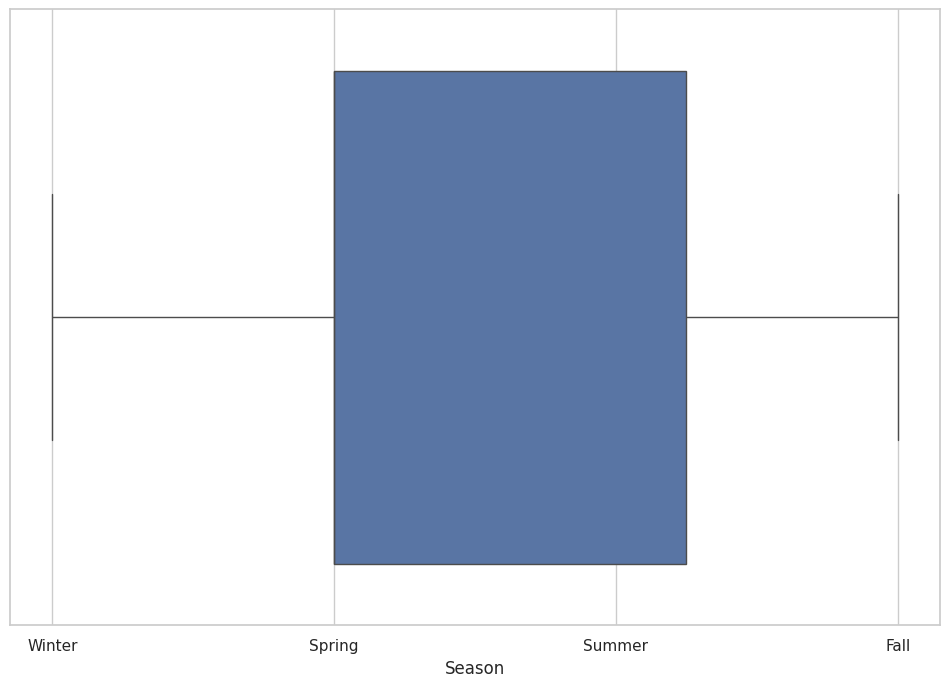

In [222]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Season'])
plt.show()

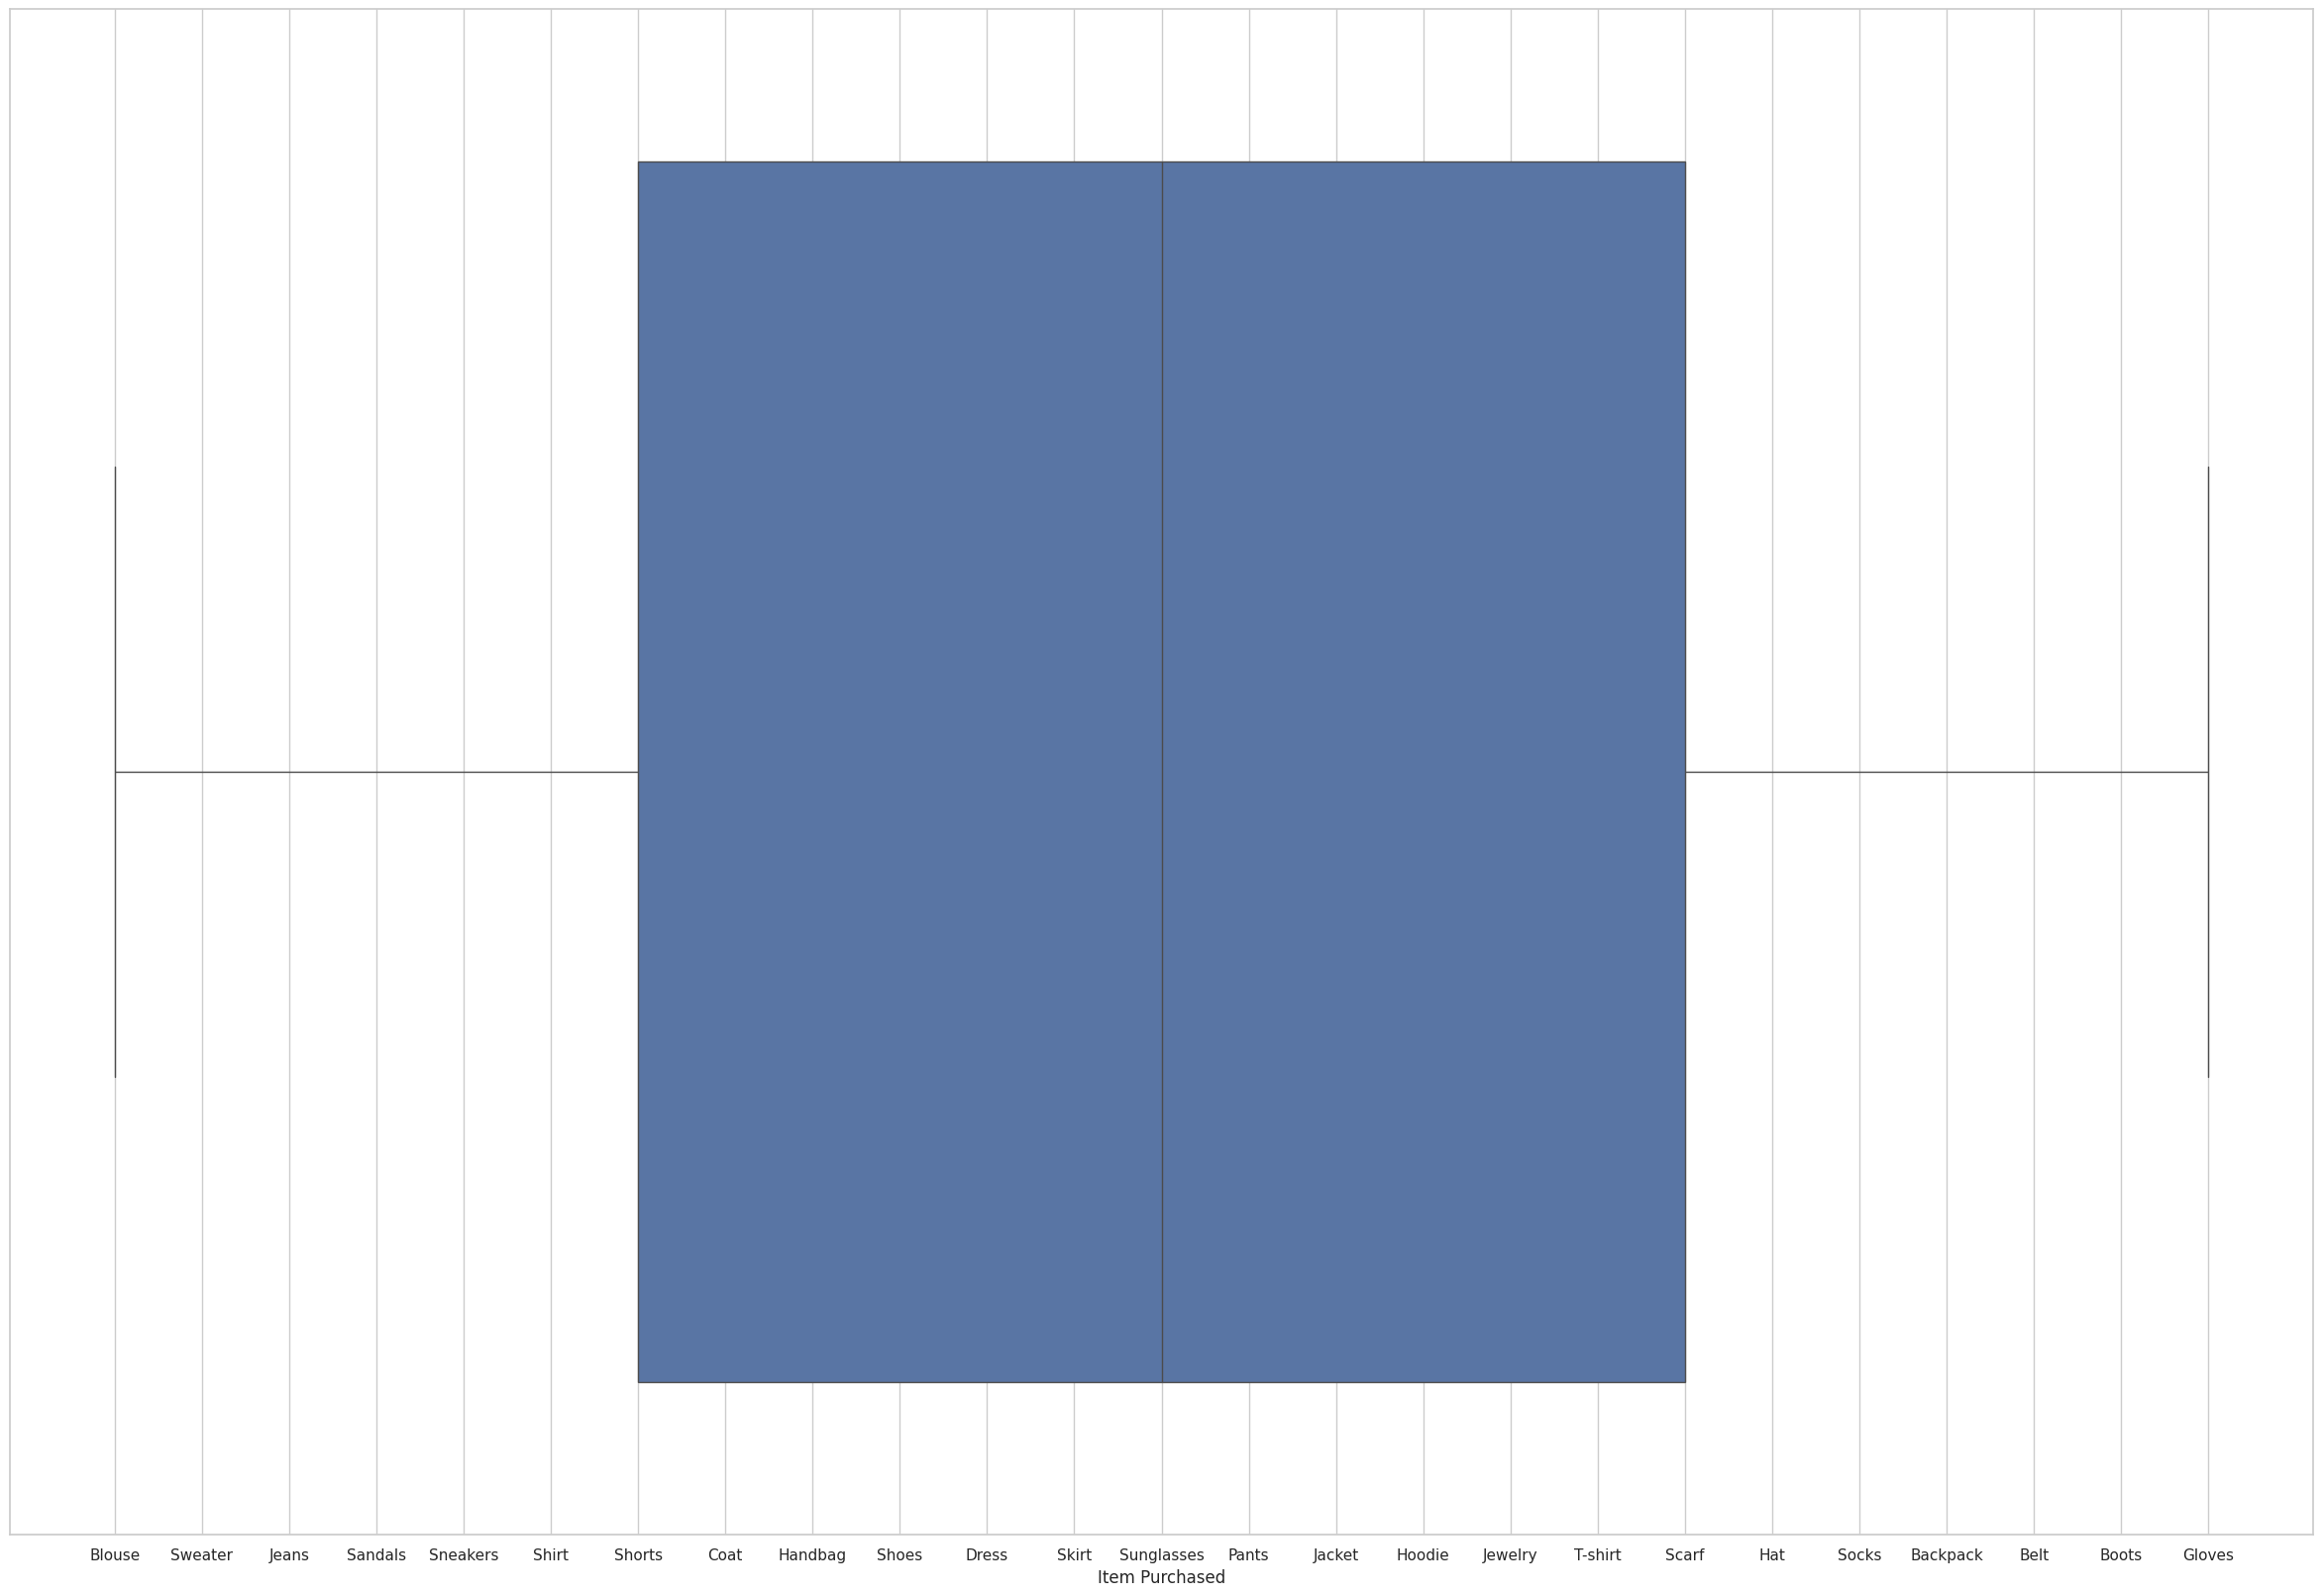

In [223]:
plt.figure(figsize=(30,20))
sns.boxplot(x=df['Item Purchased'])
plt.show()

# Data Visualization (Violin Plot)

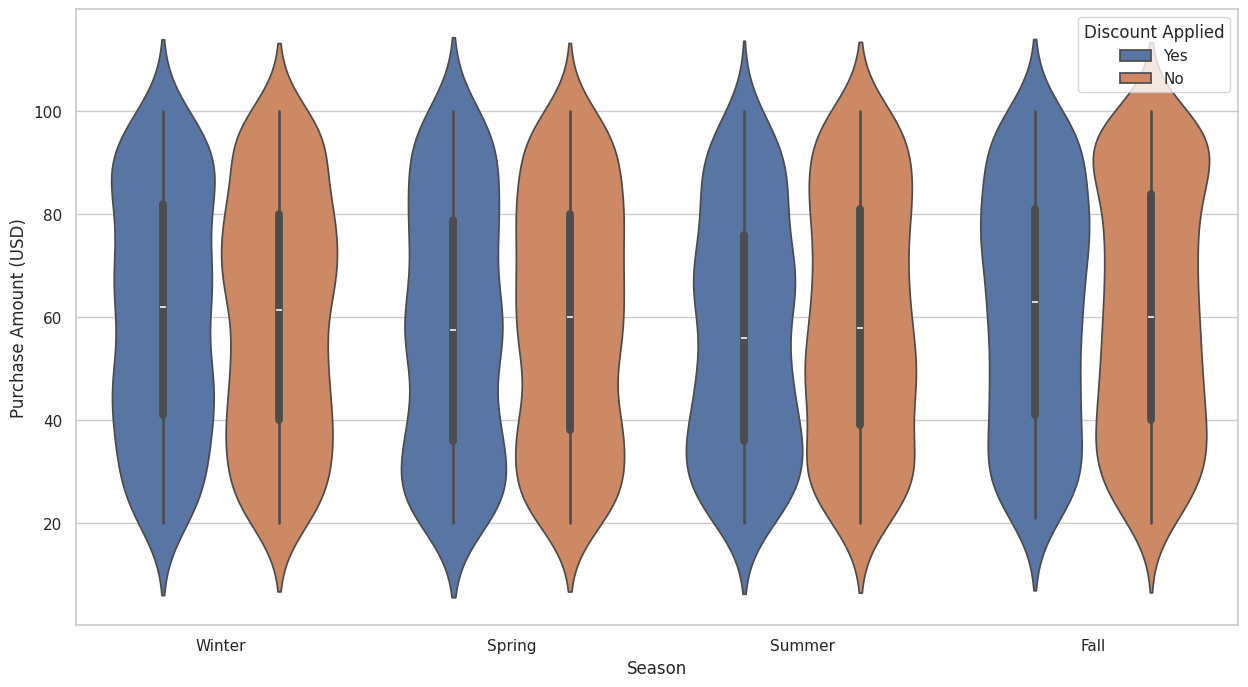

In [224]:
plt.figure(figsize=(15,8))
sns.violinplot(x=df['Season'], y=df['Purchase Amount (USD)'], hue=df['Discount Applied'])
plt.show()

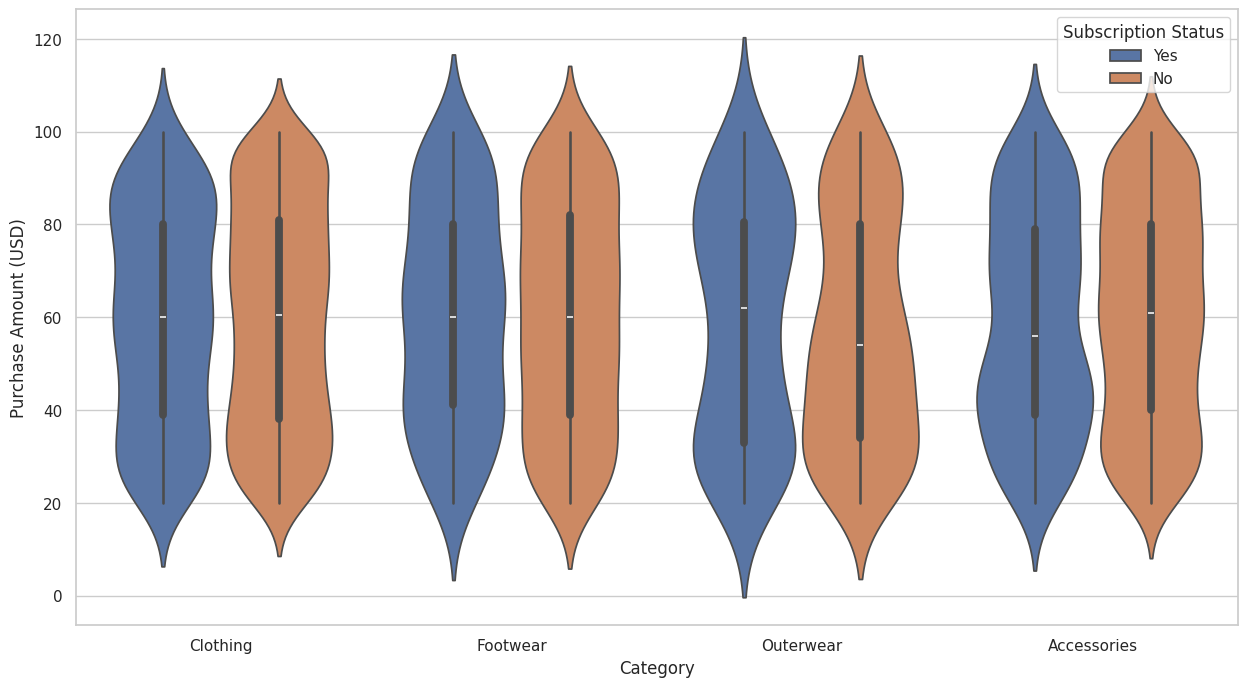

In [225]:
plt.figure(figsize=(15,8))
sns.violinplot(x=df['Category'], y=df['Purchase Amount (USD)'], hue=df['Subscription Status'])
plt.show()

# Data Visualization (Pair Plot)

<Figure size 2000x800 with 0 Axes>

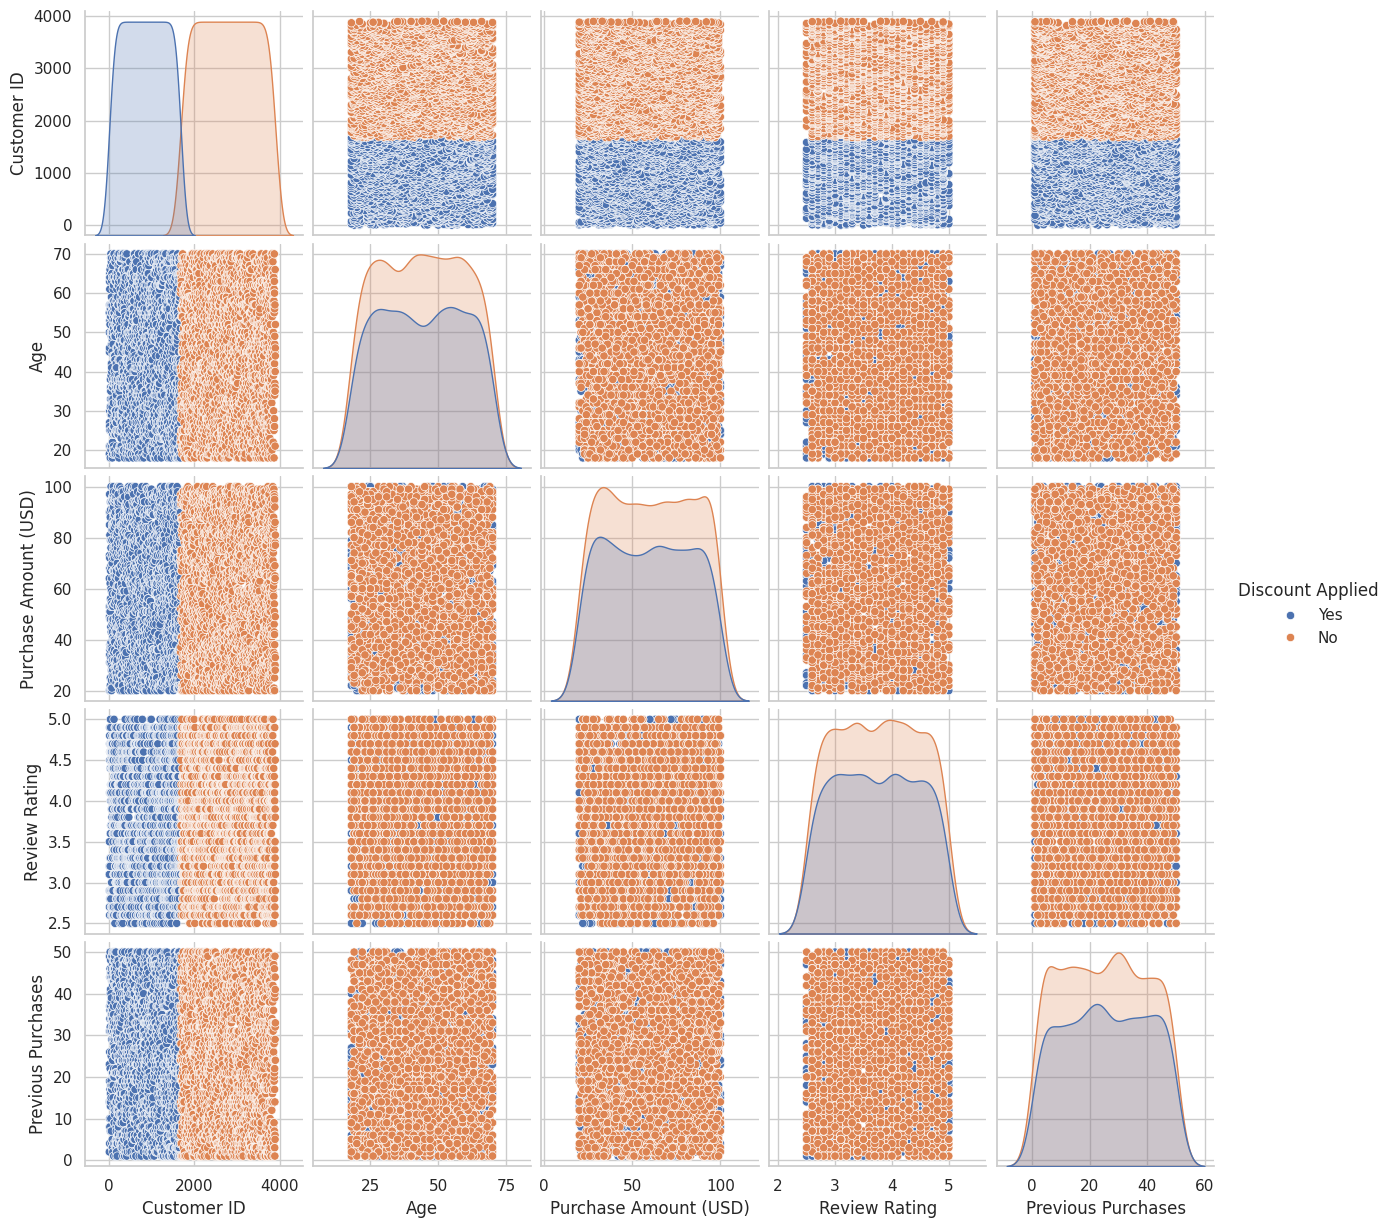

In [226]:
plt.figure(figsize=(20,8))
sns.pairplot(df, hue='Discount Applied',diag_kind='kde')
plt.show()

<Figure size 2000x800 with 0 Axes>

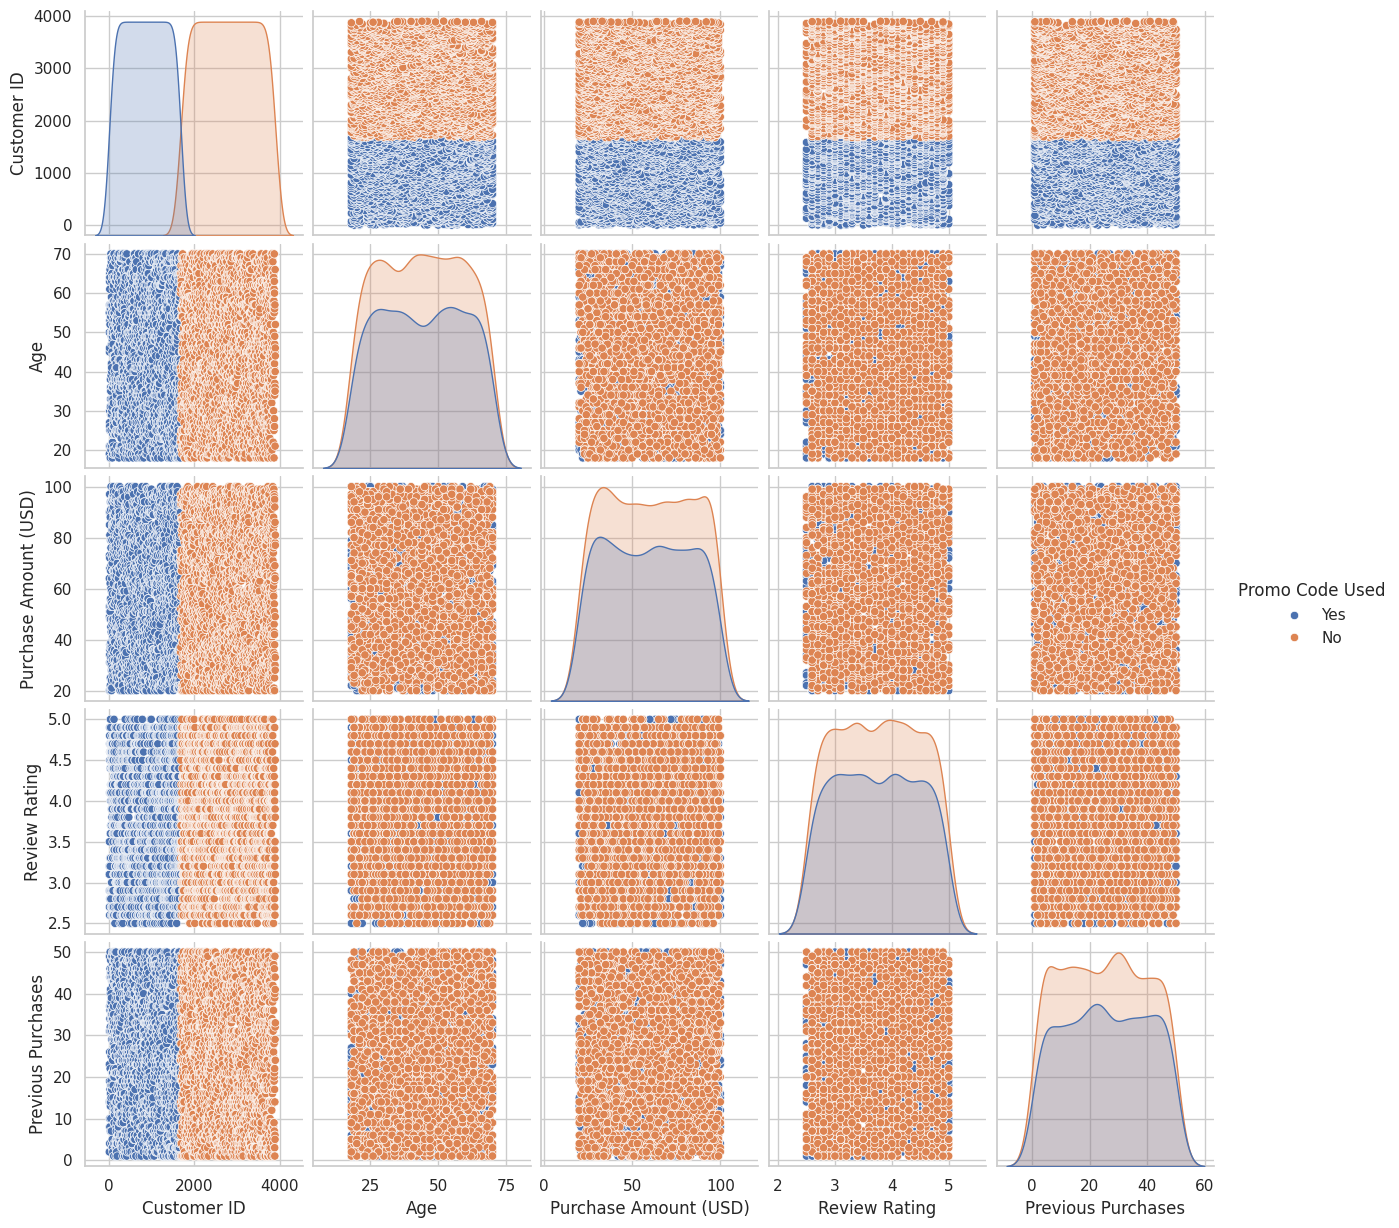

In [227]:
plt.figure(figsize=(20,8))
sns.pairplot(df, hue='Promo Code Used',diag_kind='kde')
plt.show()

# Data Visualization (Pie Plot)

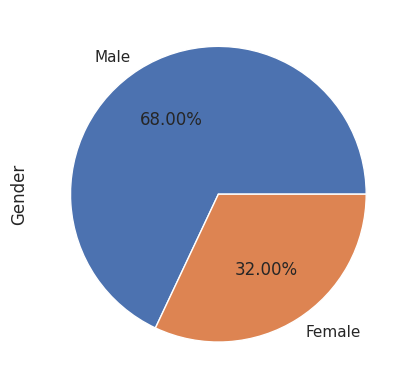

In [228]:
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.show()

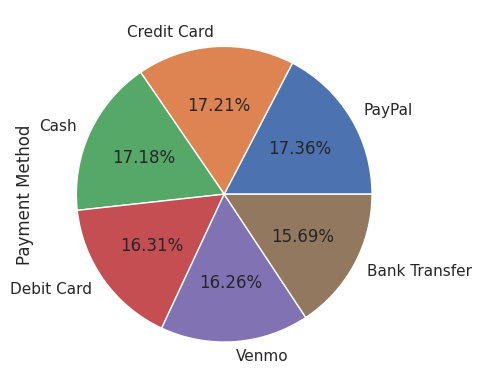

In [229]:
df['Payment Method'].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.show()

# **Exploratory Data Analysis**

# Analysis : Age and Purchase Amount (USD)

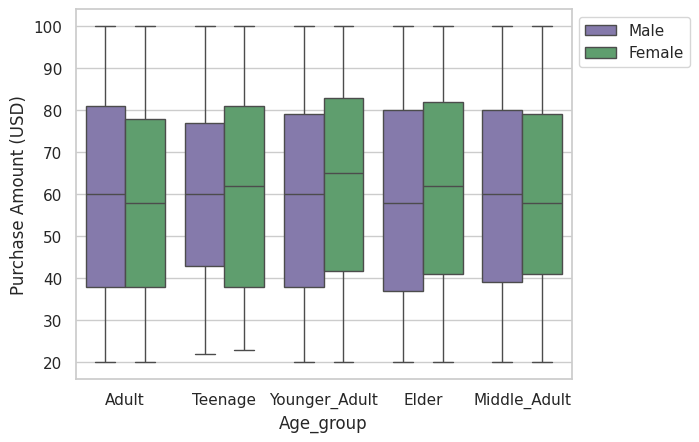

In [230]:
sns.boxplot(x="Age_group", y="Purchase Amount (USD)", hue="Gender", data=df, palette=["m", "g"])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

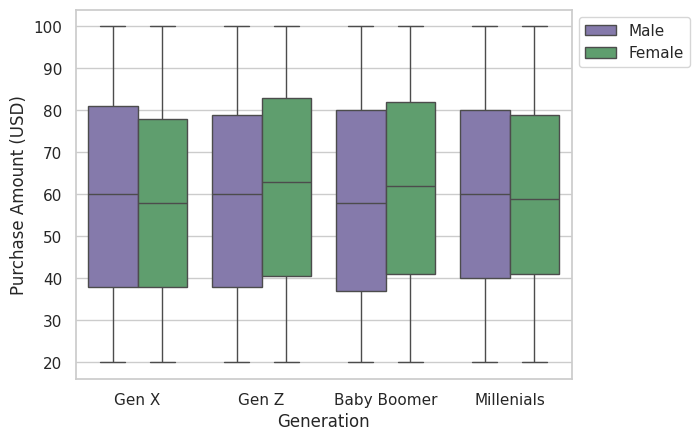

In [231]:
sns.boxplot(x="Generation", y="Purchase Amount (USD)", hue="Gender", data=df, palette=["m", "g"])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Analysis : Age and Category

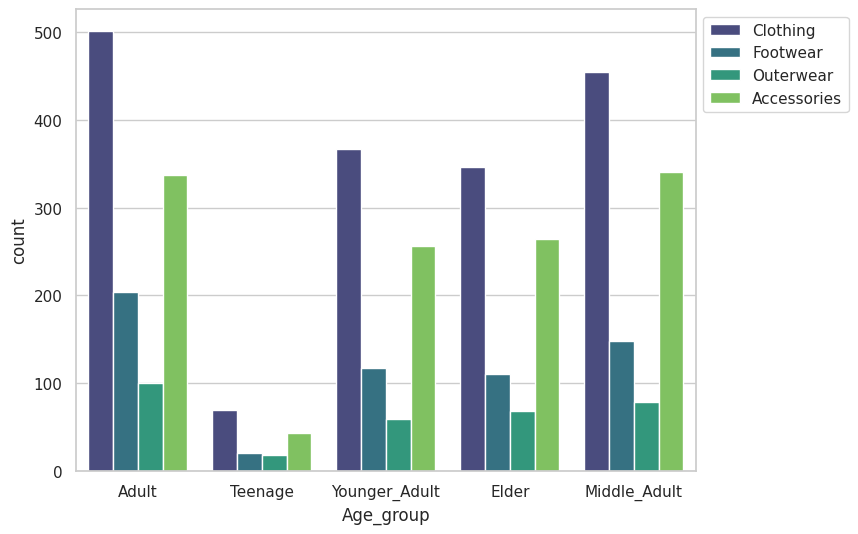

In [232]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_group', data=df, hue='Category', palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel=('Age Group')
plt.title=('Total Customer by gender')
plt.show()

# Analysis : Age and Purchase Amount and Category

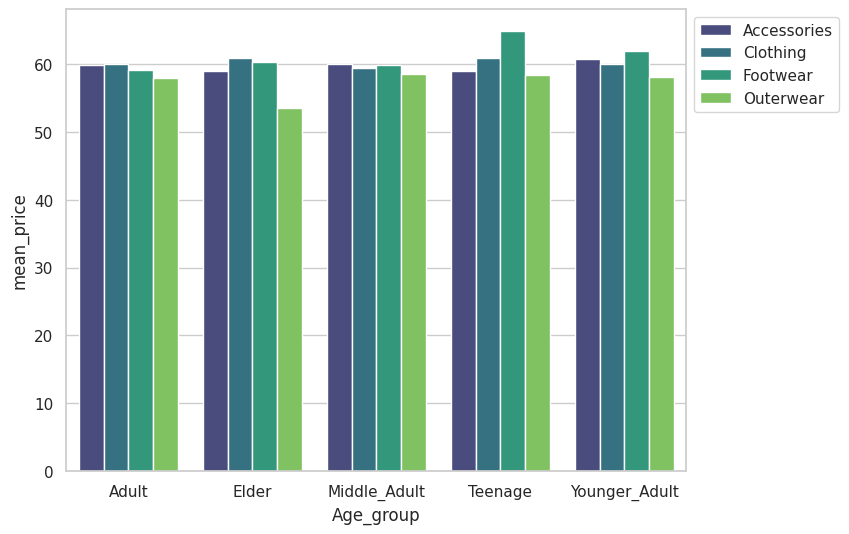

In [233]:
grp_data = df.groupby(['Age_group', 'Category']).agg(
    mean_price=pd.NamedAgg(column='Purchase Amount (USD)', aggfunc='mean')
).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Age_group', y='mean_price', data=grp_data, hue='Category', palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel=('Age Group')
plt.title=('Average Purchase Amount by Age Group and Category')
plt.show()

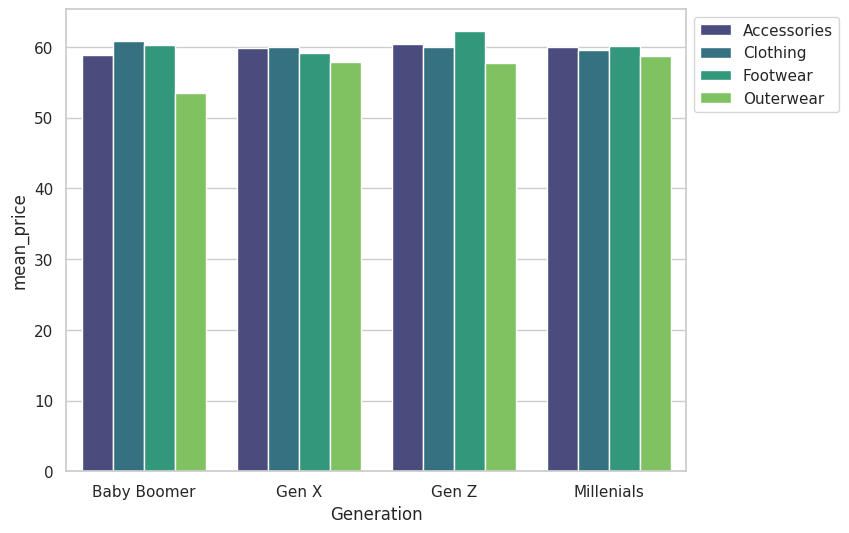

In [234]:
grp_data = df.groupby(['Generation', 'Category']).agg(
    mean_price=pd.NamedAgg(column='Purchase Amount (USD)', aggfunc='mean')
).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Generation', y='mean_price', data=grp_data, hue='Category', palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel=('Generation')
plt.title=('Average Purchase Amount by Generation and Category')
plt.show()

# Analysis : Top 10 Purchasing Region

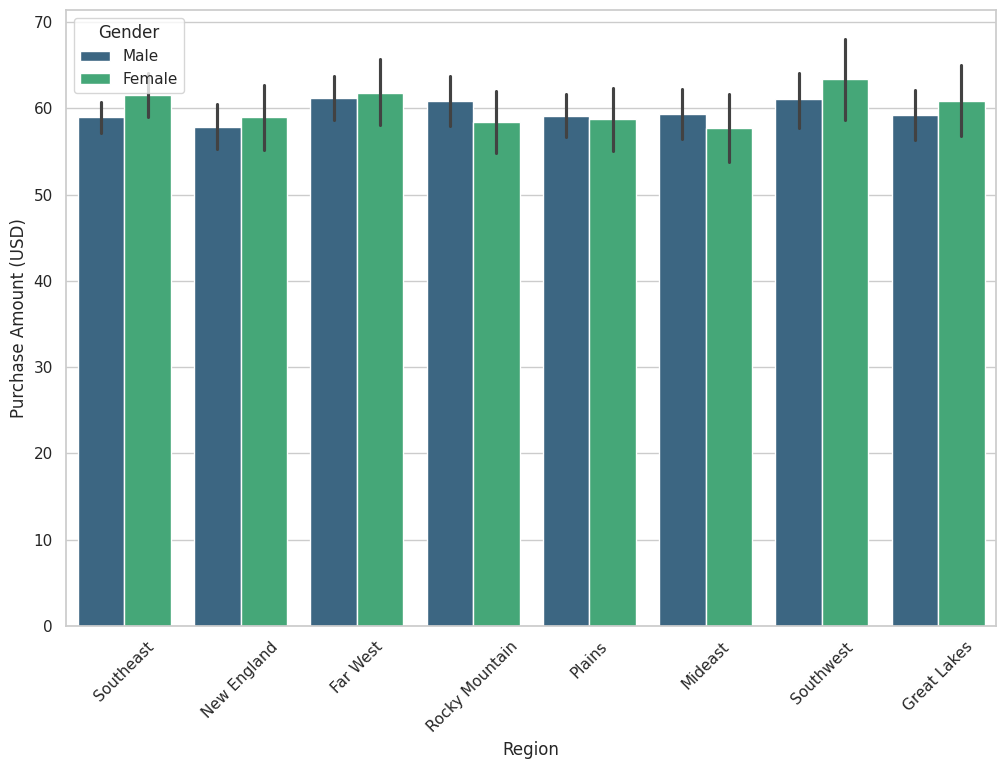

In [235]:
top_countries = df['Region'].value_counts().head(10).index

grp_data = df.groupby(['Region']).agg(
    mean_price=pd.NamedAgg(column='Purchase Amount (USD)', aggfunc='mean'))

top_countries_data = df[df['Region'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Purchase Amount (USD)', hue='Gender', data=top_countries_data, palette='viridis')
plt.title=('Top 10 Regions with Male and Female Customers')
plt.xlabel=('Region')
plt.ylabel=('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Analysis : Top 5 Regions and Category

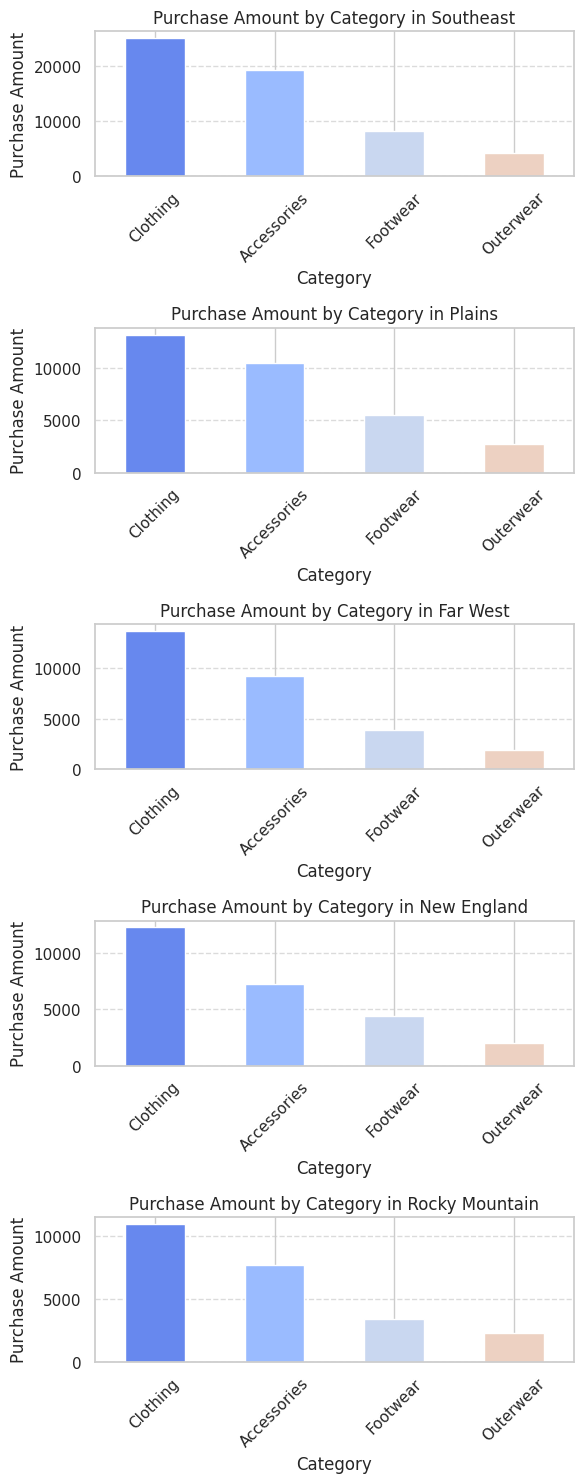

In [236]:
top_locations = df['Region'].value_counts().head(5).index

colors = sns.color_palette("coolwarm")
fig, axes = plt.subplots(5, 1, figsize=(6, 15))

for i, location in enumerate(top_locations):
    location_data = df[df['Region'] == location]

    category_purchase = location_data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

    ax = axes[i]
    category_purchase.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Purchase Amount by Category in {location}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Purchase Amount")
    ax.set_xticklabels(category_purchase.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Analysis : Impact of Promo Code Used on Purchase Amount classified by Gender

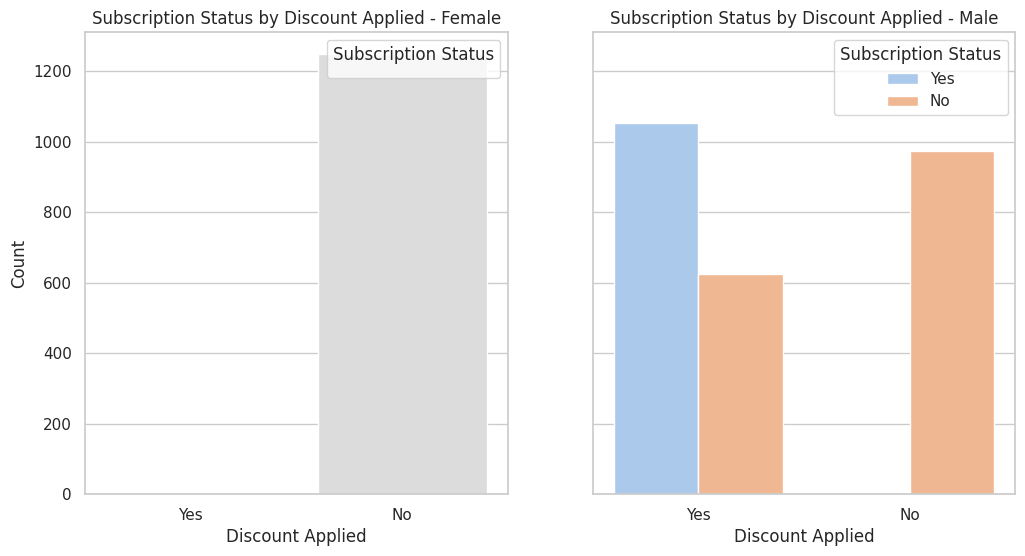

In [237]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for Female
sns.countplot(x='Discount Applied', data=df[df['Gender'] == 'Female'], palette='coolwarm',
              hue='Subscription Status', order=['Yes', 'No'], ax=axes[0])
axes[0].set_title('Subscription Status by Discount Applied - Female')
axes[0].set_xlabel('Discount Applied')
axes[0].set_ylabel('Count')
axes[0].legend(title='Subscription Status', loc='upper right')  # Add legend with specified location

# Plot for Male
sns.countplot(x='Discount Applied', data=df[df['Gender'] == 'Male'], palette='pastel',
              hue='Subscription Status', order=['Yes', 'No'], ax=axes[1])
axes[1].set_title('Subscription Status by Discount Applied - Male')
axes[1].set_xlabel('Discount Applied')
axes[1].set_ylabel('Count')
axes[1].legend(title='Subscription Status', loc='upper right')  # Add legend with specified location

# Show the plot
plt.show()

# Analysis : Impact of Promo Code Used on Subscription Status classified by Gender

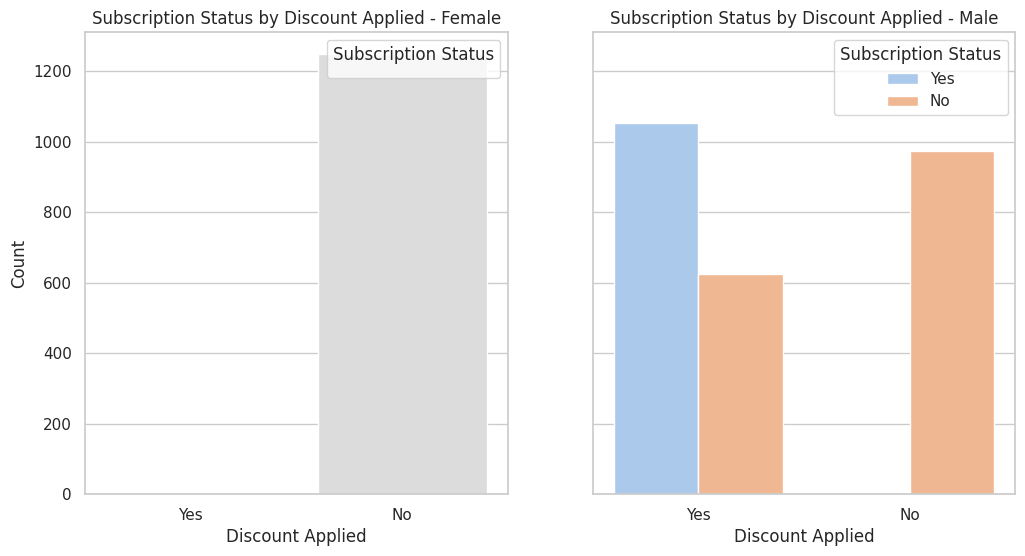

In [238]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for Female
sns.countplot(x='Discount Applied', data=df[df['Gender'] == 'Female'], palette='coolwarm',
              hue='Subscription Status', order=['Yes', 'No'], ax=axes[0])
axes[0].set_title('Subscription Status by Discount Applied - Female')
axes[0].set_xlabel('Discount Applied')
axes[0].set_ylabel('Count')
axes[0].legend(title='Subscription Status', loc='upper right')  # Add legend with specified location

# Plot for Male
sns.countplot(x='Discount Applied', data=df[df['Gender'] == 'Male'], palette='pastel',
              hue='Subscription Status', order=['Yes', 'No'], ax=axes[1])
axes[1].set_title('Subscription Status by Discount Applied - Male')
axes[1].set_xlabel('Discount Applied')
axes[1].set_ylabel('Count')
axes[1].legend(title='Subscription Status', loc='upper right')  # Add legend with specified location

# Show the plot
plt.show()

# Analysis : Review Rating and Previous Purchases and Purchase Amount (USD)

<Figure size 1500x600 with 0 Axes>

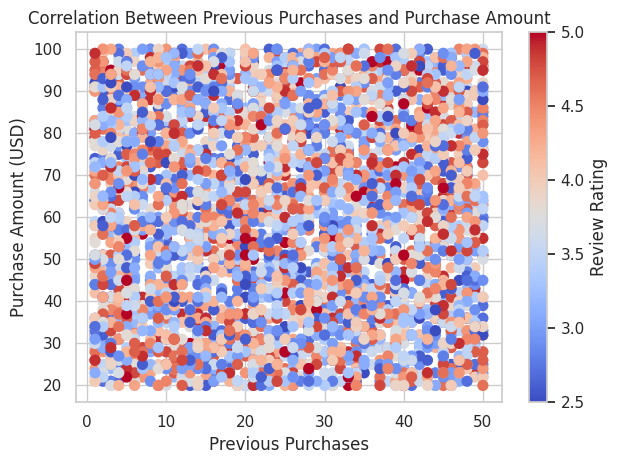

In [239]:
plt.figure(figsize=(15, 6))
scatter_plot = df.plot.scatter(x='Previous Purchases', y='Purchase Amount (USD)', c='Review Rating', cmap='coolwarm', s=50)
scatter_plot.set_title('Correlation Between Previous Purchases and Purchase Amount')
plt.tight_layout()
plt.show()

# Analysis : Purchase Amount (USD) with other Column Features

In [240]:
def get_dummy(data):
    df = data.copy()

    for x in data.columns:
        if df[x].dtype == 'object':
            df[x] = (df[x]
                     .astype('category')
                     .cat
                     .codes)

    return df

In [241]:
def show_corr_bars(target, data=df):
    x = (get_dummy(data)
         .corr()
         .abs()
         .loc[target]
         .drop(target))

    plt.figure(figsize=(20, 7))
    sns.barplot(x, palette='Blues')

    plt.xticks(rotation=45)
    plt.title(f'Correlation of {target} with selected features')
    plt.show()

<ipython-input-241-bb0d0fda3363>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x, palette='Blues')


TypeError: 'str' object is not callable

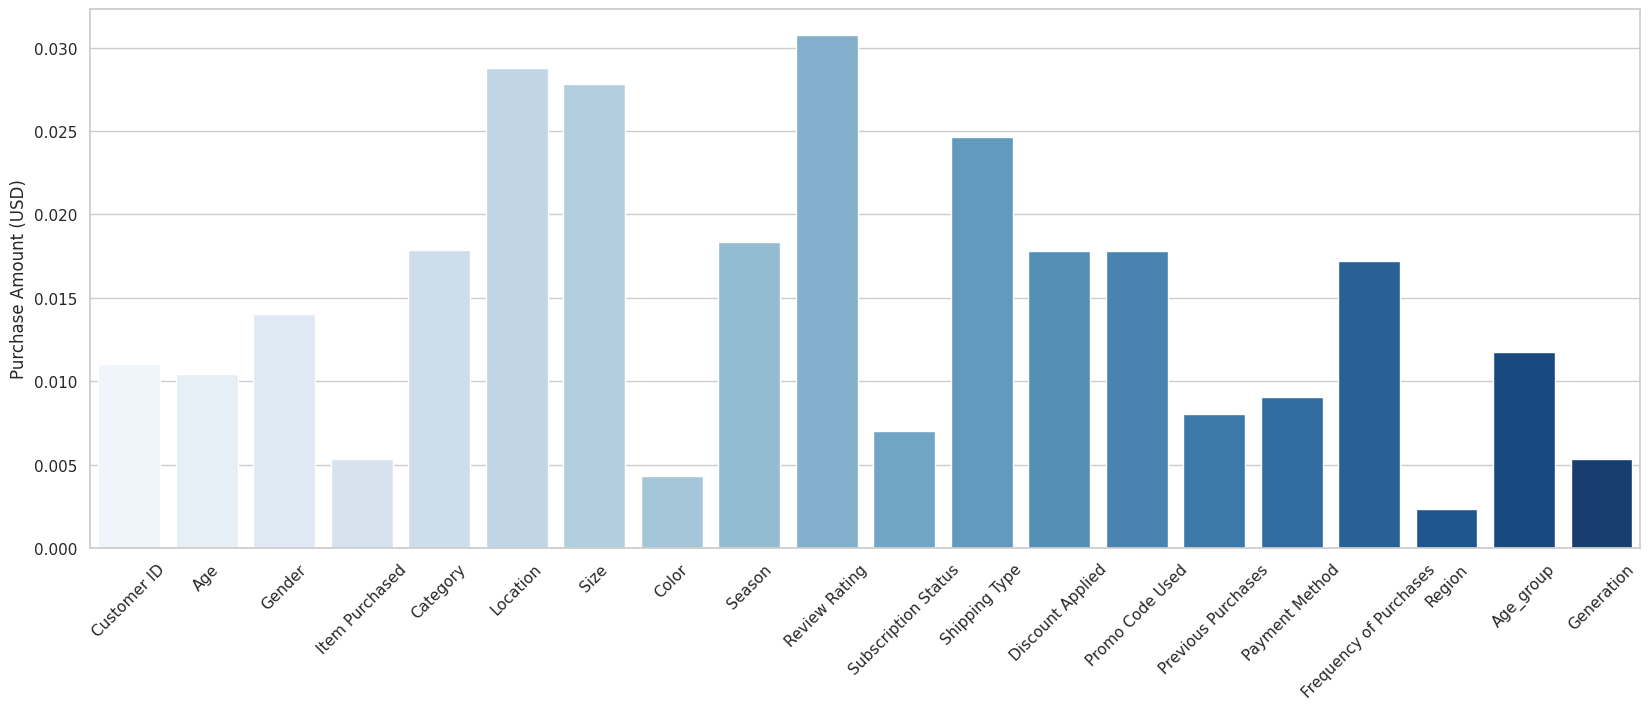

In [242]:
show_corr_bars('Purchase Amount (USD)')

# Analysis : Frequency of Purchases with other Column Features

In [243]:
def show_mean_freq(feat, data=df):
    mean_data = (data
                 .groupby('Frequency of Purchases')[feat]
                 .mean())

    if data[feat].dtype == float:
        m_val = int(mean_data.mean()) + 0.5
    else:
        m_val = int(mean_data.mean() / 10) * 10

    mean_data -= m_val

    fig, ax = plt.subplots(2, 1, figsize=(12, 10))

    sns.kdeplot(data,
               x=feat,
               hue='Frequency of Purchases',
               bw_adjust=0.4,
               ax=ax[0])

    sns.barplot(mean_data, palette='muted', ax=ax[1])

    ax[0].set_title(f'Normalised distribution of {feat}')

    ax[1].set_title(f'Mean {feat} per Frequency of Purchases')
    ax[1].set_ylabel(f'{feat} (+ {m_val})')
    fig.show()


for col in df.columns:
    if df[col].dtype != 'object':
        print(col)

Customer ID
Age
Purchase Amount (USD)
Review Rating
Previous Purchases


# **Data Preprocessing**

# Encoding Categorical Column

In [244]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the DataFrame to avoid modifying the original DataFrame
df_encoded = df.copy()

# Exclude 'Customer_ID' from the encoding process
cols_to_encode = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                  'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
                  'Payment Method', 'Frequency of Purchases', 'Region', 'Age_group', 'Generation']

# Iterate over each column and encode it using LabelEncoder
for col in cols_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Use OrdinalEncoder to perform ordinal encoding on the remaining numerical columns
remaining_cols = [col for col in df_encoded.columns if col not in ['Customer_ID'] + cols_to_encode]
encoder = OrdinalEncoder()
df_encoded[remaining_cols] = encoder.fit_transform(df_encoded[remaining_cols])

print(df_encoded.head())

   Customer ID   Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0          0.0  37.0       1               2         1                   33.0   
1          1.0   1.0       1              23         1                   44.0   
2          2.0  32.0       1              11         1                   53.0   
3          3.0   3.0       1              14         2                   70.0   
4          4.0  27.0       1               2         1                   29.0   

   Location  Size  Color  Season  ...  Subscription Status  Shipping Type  \
0        16     0      7       3  ...                    1              1   
1        18     0     12       3  ...                    1              1   
2        20     2     12       1  ...                    1              2   
3        38     1     12       1  ...                    1              3   
4        36     1     21       1  ...                    1              2   

   Discount Applied  Promo Code Used  Previous Pur

TypeError: 'str' object is not callable

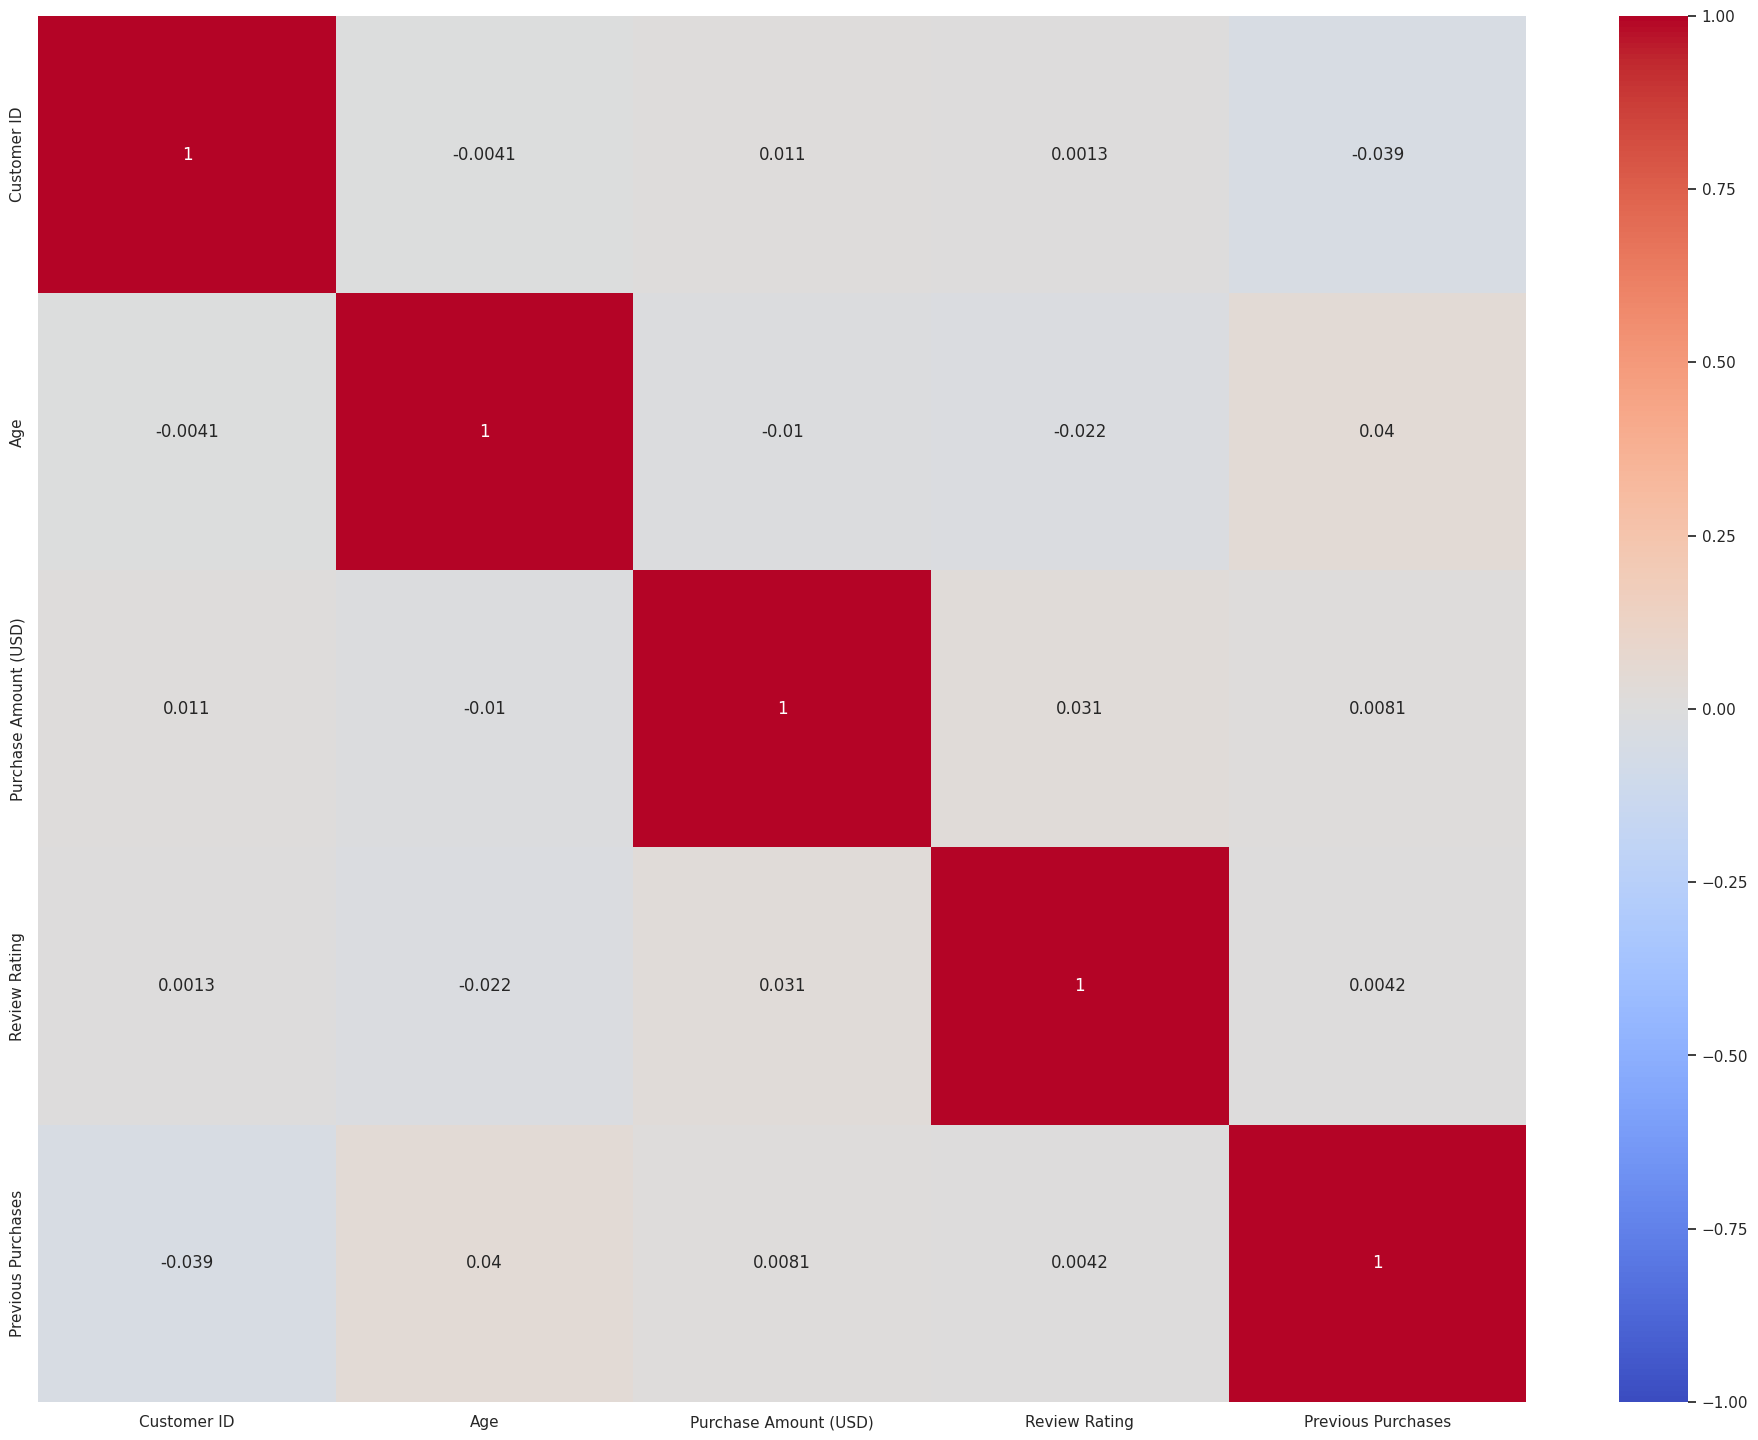

In [245]:
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [246]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   float64
 1   Age                     3900 non-null   float64
 2   Gender                  3900 non-null   int64  
 3   Item Purchased          3900 non-null   int64  
 4   Category                3900 non-null   int64  
 5   Purchase Amount (USD)   3900 non-null   float64
 6   Location                3900 non-null   int64  
 7   Size                    3900 non-null   int64  
 8   Color                   3900 non-null   int64  
 9   Season                  3900 non-null   int64  
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   int64  
 12  Shipping Type           3900 non-null   int64  
 13  Discount Applied        3900 non-null   int64  
 14  Promo Code Used         3900 non-null   

In [247]:
df_encoded = df_encoded.drop('Customer ID', axis = 1)

In [248]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   float64
 1   Gender                  3900 non-null   int64  
 2   Item Purchased          3900 non-null   int64  
 3   Category                3900 non-null   int64  
 4   Purchase Amount (USD)   3900 non-null   float64
 5   Location                3900 non-null   int64  
 6   Size                    3900 non-null   int64  
 7   Color                   3900 non-null   int64  
 8   Season                  3900 non-null   int64  
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   int64  
 11  Shipping Type           3900 non-null   int64  
 12  Discount Applied        3900 non-null   int64  
 13  Promo Code Used         3900 non-null   int64  
 14  Previous Purchases      3900 non-null   

# Modelling (Age and Purchase Amount (USD))

In [249]:
X_column = 'Generation'
y_column = 'Purchase Amount (USD)'

clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

In [250]:
X = df_encoded[['Generation', 'Purchase Amount (USD)']]
X.head()

Generation  Purchase Amount (USD)
0           1                   33.0
1           2                   44.0
2           1                   53.0
3           2                   70.0
4           1                   29.0

TypeError: 'str' object is not callable

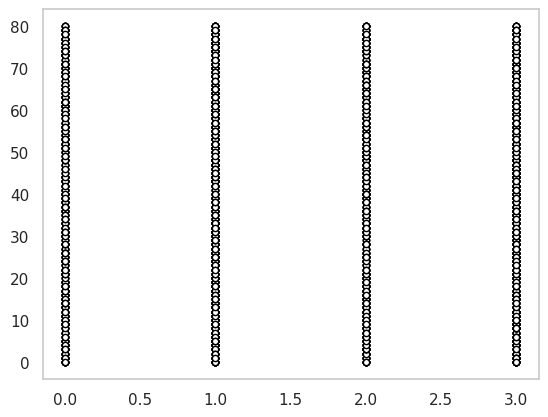

In [251]:
plt.scatter(df_encoded['Generation'],
            df_encoded['Purchase Amount (USD)'],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.title(f"Scatter Plot {X_column} Vs {y_column}")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

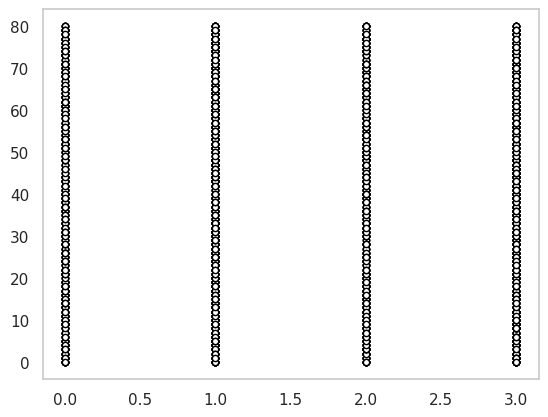

In [254]:
plt.scatter(X.iloc[:, 0],
            X.iloc[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.title("Scatter Plot Generasi Seseorang dengan Pembayaran yang mereka lakukan (No Scaler)")
plt.xlabel("Generasi", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

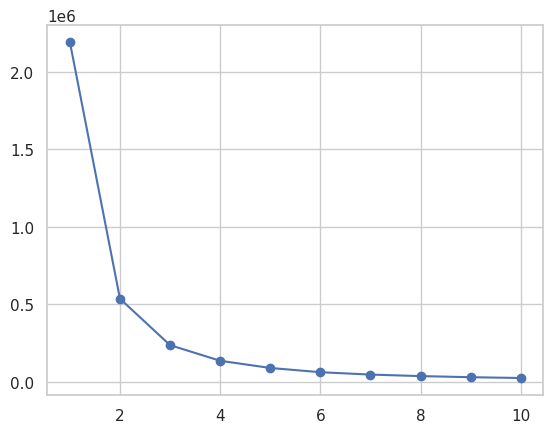

In [255]:
features = df_encoded[['Generation', 'Purchase Amount (USD)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**k-Means**

In [259]:
km = KMeans(n_clusters=4, random_state=45, n_init="auto")
km.fit(X)

y_km = km.predict(X)

In [260]:
pd.DataFrame(y_km).value_counts()

1    1024
2     987
3     971
0     918
dtype: int64

In [261]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=20,
            c='lightgreen',
            marker='s',
            edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=20, c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=20, c='lightblue',
            marker='v',
            edgecolor='black',
            label='Cluster 3')

plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=20, c='darkblue',
            marker='s',
            edgecolor='black',
            label='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=200, marker='*',
            c='red',
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()

InvalidIndexError: (array([ True, False, False, ..., False, False, False]), 0)

In [262]:
kmeans = pd.DataFrame(y_km, columns=["KMeans Cluster with No Scaling"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
kmeans[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']]

# Print the DataFrame
print(kmeans)

      KMeans Cluster with No Scaling  Gender  Generation     Category  \
0                                  0    Male       Gen X     Clothing   
1                                  2    Male       Gen Z     Clothing   
2                                  2    Male       Gen X     Clothing   
3                                  1    Male       Gen Z     Footwear   
4                                  0    Male       Gen X     Clothing   
...                              ...     ...         ...          ...   
3895                               3  Female  Millenials     Clothing   
3896                               0  Female       Gen X  Accessories   
3897                               3  Female       Gen X  Accessories   
3898                               2  Female  Millenials     Footwear   
3899                               1  Female       Gen X  Accessories   

      Purchase Amount (USD)       Region  
0                        53    Southeast  
1                        64  New Engl

In [263]:
score = silhouette_score(X, y_km)

clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

new_row = {"Model": "K-Means No Scaling", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0  K-Means No Scaling          0.560821

**Agglomerative Clustering**

In [264]:
agg_model = AgglomerativeClustering(n_clusters=4)

agg_model.fit(X)

y_agg = agg_model.labels_

In [265]:
pd.DataFrame(y_agg).value_counts()

0    1513
1     977
2     743
3     667
dtype: int64

In [266]:
plt.scatter(X[y_agg == 0, 0],
            X[y_agg == 0, 1],
            s=20,
            c='lightgreen',
            marker='s',
            edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_agg == 1, 0],
            X[y_agg == 1, 1],
            s=20, c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_agg == 2, 0],
            X[y_agg == 2, 1],
            s=20, c='lightblue',
            marker='v',
            edgecolor='black',
            label='Cluster 3')

plt.scatter(X[y_agg == 3, 0],
            X[y_agg == 3, 1],
            s=20, c='darkblue',
            marker='s',
            edgecolor='black',
            label='Cluster 4')

plt.scatter(agg_model.cluster_centers_[:, 0],
            agg_model.cluster_centers_[:, 1],
            s=200, marker='*',
            c='red',
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()

InvalidIndexError: (array([False, False,  True, ..., False,  True,  True]), 0)

In [267]:
agh = pd.DataFrame(y_agg, columns=["Agglomerative Cluster with No Scaling"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
agh[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']]

# Print the DataFrame
print(agh)

      Agglomerative Cluster with No Scaling  Gender  Generation     Category  \
0                                         1    Male       Gen X     Clothing   
1                                         3    Male       Gen Z     Clothing   
2                                         0    Male       Gen X     Clothing   
3                                         0    Male       Gen Z     Footwear   
4                                         1    Male       Gen X     Clothing   
...                                     ...     ...         ...          ...   
3895                                      2  Female  Millenials     Clothing   
3896                                      1  Female       Gen X  Accessories   
3897                                      2  Female       Gen X  Accessories   
3898                                      0  Female  Millenials     Footwear   
3899                                      0  Female       Gen X  Accessories   

      Purchase Amount (USD)       Regio

In [268]:
score_agg = silhouette_score(X, y_agg)

clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

new_row_agg = {"Model": "Agglomerative No-Scaling", "Silhouette Score": score_agg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row_agg])], ignore_index=True)

clus_score = clus_score.sort_values(by="Silhouette Score", ascending=False)

print(clus_score)

                      Model  Silhouette Score
0  Agglomerative No-Scaling          0.501314


**GMM**

In [294]:
gmm = GaussianMixture(n_components=4, random_state=42)

gmm.fit(X)

labels = gmm.predict(X)

In [295]:
pd.DataFrame(labels).value_counts()

3    123
2    119
0     91
1     63
dtype: int64

In [ ]:
# Plot clusters
plt.scatter(X[X_column], X[y_column], c=labels, s=40, cmap='viridis')
plt.title(f"Scatter Plot {X_column} Vs {y_column}")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)

plt.legend(labels)
plt.show()

In [296]:
gmm = pd.DataFrame(labels, columns=["GMM Cluster with No Scaling"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
gmm[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']]

# Print the DataFrame
print(gmm)

     GMM Cluster with No Scaling Gender  Generation     Category  \
0                              3   Male       Gen X     Clothing   
1                              1   Male       Gen Z     Clothing   
2                              3   Male       Gen X     Clothing   
3                              1   Male       Gen Z     Footwear   
4                              1   Male       Gen X     Clothing   
..                           ...    ...         ...          ...   
391                            0   Male  Millenials     Clothing   
392                            3   Male       Gen Z     Clothing   
393                            1   Male  Millenials     Footwear   
394                            0   Male  Millenials  Accessories   
395                            0   Male  Millenials     Footwear   

     Purchase Amount (USD)          Region  
0                       53       Southeast  
1                       64     New England  
2                       73     New England  
3  

In [270]:
score = silhouette_score(X, labels)

new_row = {"Model": f"Gaussian {X_column} {y_column} No-Scaling", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
1  Gaussian Generation Purchase Amount (USD) No-S...          0.559333
0                           Agglomerative No-Scaling          0.501314

In [271]:
gmm_clusters = pd.DataFrame(labels, columns=["GMM Cluster"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
gmm_clusters[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']]

# Print the DataFrame
print(gmm_clusters)

      GMM Cluster  Gender  Generation     Category  Purchase Amount (USD)  \
0               3    Male       Gen X     Clothing                     53   
1               0    Male       Gen Z     Clothing                     64   
2               0    Male       Gen X     Clothing                     73   
3               1    Male       Gen Z     Footwear                     90   
4               3    Male       Gen X     Clothing                     49   
...           ...     ...         ...          ...                    ...   
3895            2  Female  Millenials     Clothing                     28   
3896            3  Female       Gen X  Accessories                     49   
3897            2  Female       Gen X  Accessories                     33   
3898            0  Female  Millenials     Footwear                     77   
3899            1  Female       Gen X  Accessories                     81   

           Region  
0       Southeast  
1     New England  
2     New Engla

**BIRCH**

In [ ]:
from sklearn.cluster import Birch

# Create Birch Clustering model
birch_model = Birch(n_clusters=4, threshold=0.5, branching_factor=50)

# Fit the model to your scaled data
birch_model.fit(X_scaled)

# Predict cluster labels
y_birch = birch_model.predict(X_scaled)

In [ ]:
pd.DataFrame(y_birch).value_counts()

0    1966
1     889
3     834
2     211
dtype: int64

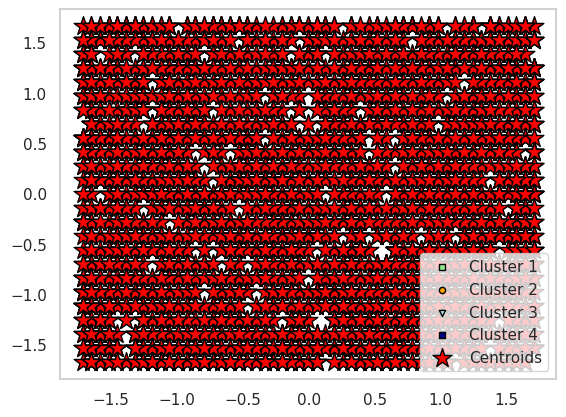

In [ ]:
# Plot clusters
plt.scatter(X_scaled[y_birch == 0, 0], X_scaled[y_birch == 0, 1], s=20, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_scaled[y_birch == 1, 0], X_scaled[y_birch == 1, 1], s=20, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X_scaled[y_birch == 2, 0], X_scaled[y_birch == 2, 1], s=20, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X_scaled[y_birch == 3, 0], X_scaled[y_birch == 3, 1], s=20, c='darkblue', marker='s', edgecolor='black', label='Cluster 4')

# Plot centroids
cluster_centers = birch_model.subcluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='*', c='red', edgecolor='black', label='Centroids')

# Customize plot
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
birch_df = pd.DataFrame(y_birch, columns=["Birch Cluster"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
birch_df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']]

# Print the DataFrame
print(birch_df)

      Birch Cluster  Gender  Generation     Category  Purchase Amount (USD)  \
0                 3    Male       Gen X     Clothing                     53   
1                 0    Male       Gen Z     Clothing                     64   
2                 1    Male       Gen X     Clothing                     73   
3                 0    Male       Gen Z     Footwear                     90   
4                 1    Male       Gen X     Clothing                     49   
...             ...     ...         ...          ...                    ...   
3895              0  Female  Millenials     Clothing                     28   
3896              3  Female       Gen X  Accessories                     49   
3897              3  Female       Gen X  Accessories                     33   
3898              0  Female  Millenials     Footwear                     77   
3899              3  Female       Gen X  Accessories                     81   

           Region  
0       Southeast  
1     New E

In [ ]:
birch_model_mm = Birch(n_clusters=4)

# Fit the model to your scaled data
birch_model_mm.fit(X_scaled_mm)

# Predict cluster labels
y_birch_mm = birch_model_mm.predict(X_scaled_mm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(


In [ ]:
pd.DataFrame(y_birch_mm).value_counts()

0    396
dtype: int64

In [ ]:
score = silhouette_score(X_scaled, y_birch)

clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

new_row = {"Model": "Birch SS", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0  Birch SS          0.067698

In [ ]:
score = silhouette_score(X_scaled_mm, y_birch_mm)

new_row = {"Model": "Birch MM", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# Modelling (Age and Purchase Amount (USD) khusus Southeast Region)

In [275]:
df_encoded.head()

Age  Gender  Item Purchased  Category  Purchase Amount (USD)  Location  \
0  37.0       1               2         1                   33.0        16   
1   1.0       1              23         1                   44.0        18   
2  32.0       1              11         1                   53.0        20   
3   3.0       1              14         2                   70.0        38   
4  27.0       1               2         1                   29.0        36   

   Size  Color  Season  Review Rating  Subscription Status  Shipping Type  \
0     0      7       3            6.0                    1              1   
1     0     12       3            6.0                    1              1   
2     2     12       1            6.0                    1              2   
3     1     12       1           10.0                    1              3   
4     1     21       1            2.0                    1              2   

   Discount Applied  Promo Code Used  Previous Purchases  Payment Method  \
0                 1                1                13.0               5   
1                 1                1                 1.0               1   
2                 1                1                22.0               2   
3                 1                1                48.0               4   
4                 1                1                30.0               4   

   Frequency of Purchases  Region  Age_group  Generation  
0                       3       6          0           1  
1                       3       3          3           2  
2                       6       3          0           1  
3                       6       3          4           2  
4                       0       0          0           1

In [276]:
southeast = df_encoded[df_encoded["Region"] == 1]

In [277]:
X = southeast[['Generation', 'Purchase Amount (USD)']]
X.head()

Generation  Purchase Amount (USD)
36           3                   49.0
37           3                   25.0
43           2                   49.0
74           1                   38.0
87           1                   33.0

TypeError: 'str' object is not callable

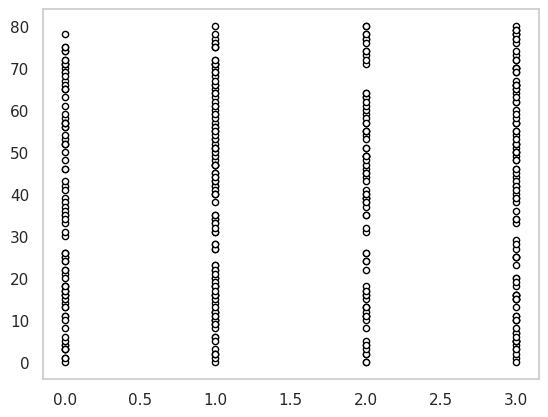

In [279]:
plt.scatter(southeast['Generation'],
            southeast['Purchase Amount (USD)'],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.title("Scatter Plot Generasi Seseorang dengan Pembayaran yang mereka lakukan (Southeast) No-Scaling")
plt.xlabel("Generation", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

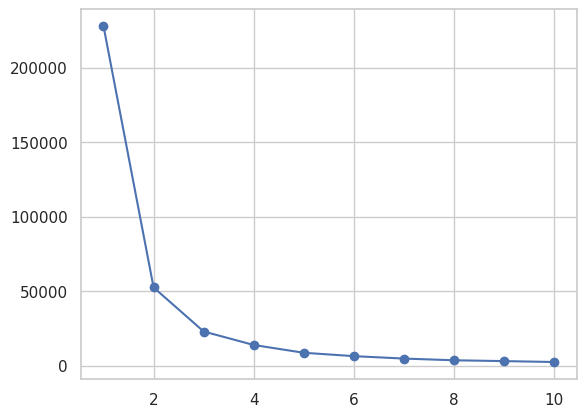

In [280]:
features = southeast[['Generation', 'Purchase Amount (USD)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**k-Means**

In [281]:
km = KMeans(n_clusters=4, random_state=45, n_init="auto")
km.fit(X)

y_km = km.predict(X)

In [282]:
pd.DataFrame(y_km).value_counts()

0    126
1     98
3     90
2     82
dtype: int64

In [283]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=20,
            c='lightgreen',
            marker='s',
            edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=20, c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=20, c='lightblue',
            marker='v',
            edgecolor='black',
            label='Cluster 3')

plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=20, c='darkblue',
            marker='s',
            edgecolor='black',
            label='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=200, marker='*',
            c='red',
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()

InvalidIndexError: (array([False, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True,  True, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False]), 0)

In [284]:
kmeans = pd.DataFrame(y_km, columns=["KMeans Cluster with No-Scaling"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
kmeans[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)']]

# Print the DataFrame
print(kmeans)

     KMeans Cluster with No-Scaling Gender  Generation     Category  \
0                                 1   Male       Gen X     Clothing   
1                                 2   Male       Gen Z     Clothing   
2                                 1   Male       Gen X     Clothing   
3                                 2   Male       Gen Z     Footwear   
4                                 2   Male       Gen X     Clothing   
..                              ...    ...         ...          ...   
391                               3   Male  Millenials     Clothing   
392                               2   Male       Gen Z     Clothing   
393                               2   Male  Millenials     Footwear   
394                               3   Male  Millenials  Accessories   
395                               3   Male  Millenials     Footwear   

     Purchase Amount (USD)  
0                       53  
1                       64  
2                       73  
3                       90  
4 

In [285]:
score = silhouette_score(X, y_km)

clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

new_row = {"Model": "K-Means No-Scaling", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=True)

Model  Silhouette Score
0  K-Means No-Scaling           0.56858

**Agglomerative**

In [286]:
agg_model = AgglomerativeClustering(n_clusters=4)

agg_model.fit(X)

y_agg = agg_model.labels_

In [287]:
pd.DataFrame(y_agg).value_counts()

0    122
1    116
2     98
3     60
dtype: int64

In [288]:
cluster_representatives = np.zeros((4, X.shape[1]))

# Calculate the mean of each cluster's points
for i in range(4):
    cluster_representatives[i] = np.mean(X[y_agg == i], axis=0)

# Plot the cluster points
plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1], s=20, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1], s=20, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1], s=20, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_agg == 3, 0], X[y_agg == 3, 1], s=20, c='darkblue', marker='s', edgecolor='black', label='Cluster 4')

# Plot the cluster representatives
plt.scatter(cluster_representatives[:, 0], cluster_representatives[:, 1], s=200, marker='*', c='red', edgecolor='black', label='Cluster Representatives')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

InvalidIndexError: (array([ True, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True, False, False, False]), 0)

In [289]:
agh = pd.DataFrame(y_agg, columns=["Agglomerative Cluster with No-Scaling"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
agh[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']]

# Print the DataFrame
print(agh)

     Agglomerative Cluster with No-Scaling Gender  Generation     Category  \
0                                        0   Male       Gen X     Clothing   
1                                        3   Male       Gen Z     Clothing   
2                                        0   Male       Gen X     Clothing   
3                                        0   Male       Gen Z     Footwear   
4                                        3   Male       Gen X     Clothing   
..                                     ...    ...         ...          ...   
391                                      2   Male  Millenials     Clothing   
392                                      0   Male       Gen Z     Clothing   
393                                      3   Male  Millenials     Footwear   
394                                      2   Male  Millenials  Accessories   
395                                      2   Male  Millenials     Footwear   

     Purchase Amount (USD)          Region  
0                 

In [290]:
score_agg = silhouette_score(X, y_agg)

clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

new_row_agg = {"Model": "Agglomerative No-Scaling", "Silhouette Score": score_agg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row_agg])], ignore_index=True)

clus_score = clus_score.sort_values(by="Silhouette Score", ascending=False)

print(clus_score)

                      Model  Silhouette Score
0  Agglomerative No-Scaling          0.547535


**GMM**

In [297]:
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the model to the data
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

In [298]:
pd.DataFrame(labels).value_counts()

3    123
2    119
0     91
1     63
dtype: int64

In [ ]:
# Plot clusters
plt.scatter(X[X_column], X[y_column], c=labels, s=40, cmap='viridis')
plt.title(f"Scatter Plot {X_column} Vs {y_column}")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)

plt.colorbar(label='Cluster')
plt.show()

In [292]:
score = silhouette_score(X, labels)

new_row = {"Model": f"Gaussian {X_column} {y_column} No-Scaling", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0                           Agglomerative No-Scaling          0.547535
1  Gaussian Generation Purchase Amount (USD) No-S...          0.545607

In [293]:
gmm_clusters = pd.DataFrame(labels, columns=["GMM Cluster"])

# Add 'Generation' and 'Purchase Amount (USD)' columns from the original DataFrame
gmm_clusters[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']] = df[['Gender', 'Generation', 'Category', 'Purchase Amount (USD)', 'Region']]

# Print the DataFrame
print(gmm_clusters)

     GMM Cluster Gender  Generation     Category  Purchase Amount (USD)  \
0              3   Male       Gen X     Clothing                     53   
1              1   Male       Gen Z     Clothing                     64   
2              3   Male       Gen X     Clothing                     73   
3              1   Male       Gen Z     Footwear                     90   
4              1   Male       Gen X     Clothing                     49   
..           ...    ...         ...          ...                    ...   
391            0   Male  Millenials     Clothing                     86   
392            3   Male       Gen Z     Clothing                     82   
393            1   Male  Millenials     Footwear                     65   
394            0   Male  Millenials  Accessories                     29   
395            0   Male  Millenials     Footwear                     65   

             Region  
0         Southeast  
1       New England  
2       New England  
3       New

**BIRCH**

# **Modelling**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

TypeError: 'str' object is not callable

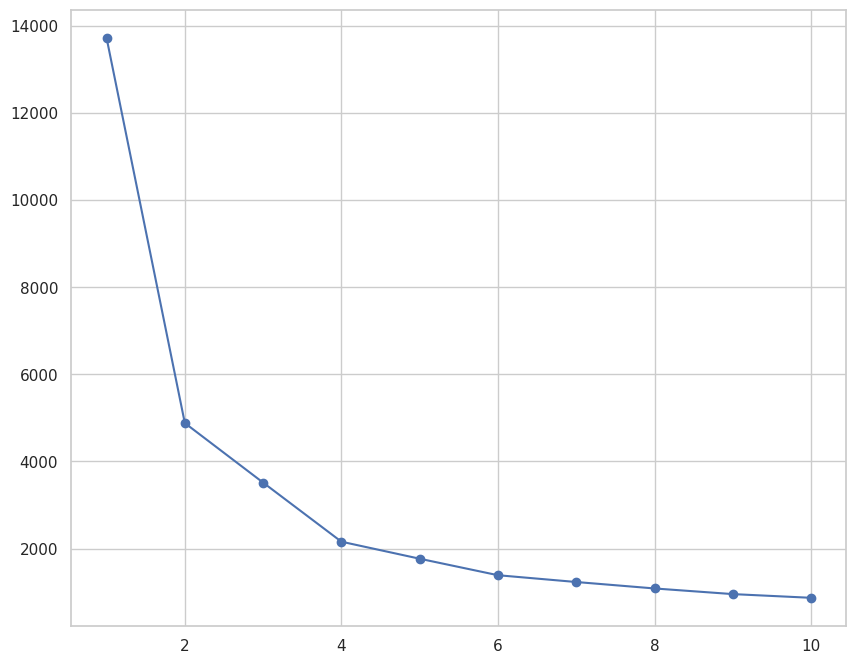

In [ ]:
# Dropping non-feature columns, 'Customer ID' is not a feature and the other features that are being dropped are highly correlated
features = df_encoded.drop(['Subscription Status', 'Discount Applied', 'Promo Code Used', 'Gender'], axis=1)

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Using the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# k-Means using Dimensionality Reduction (PCA)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: 'str' object is not callable

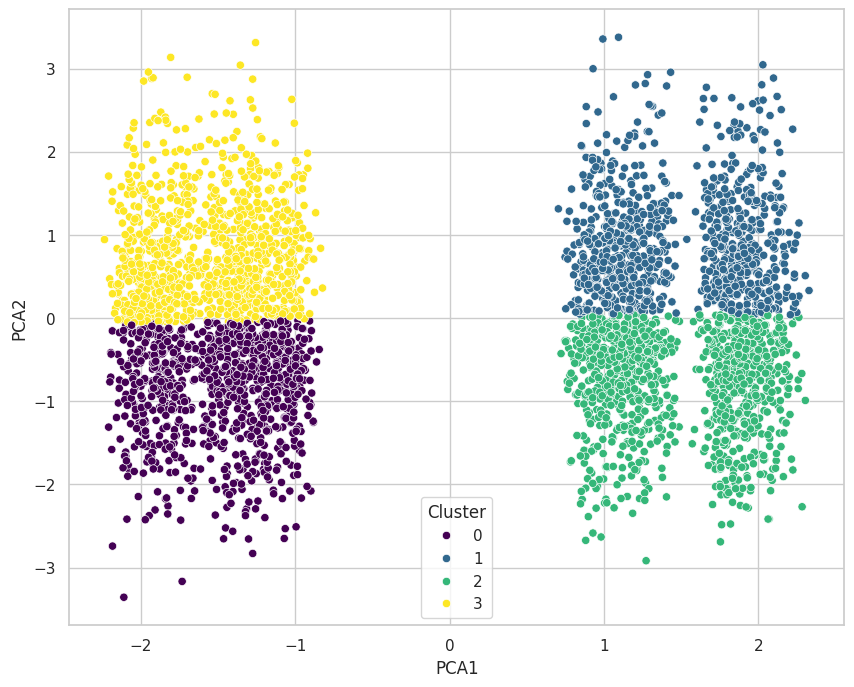

In [ ]:
# Apply KMeans clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add the cluster data to the PCA result
pca_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters by PCA Components')
plt.show()

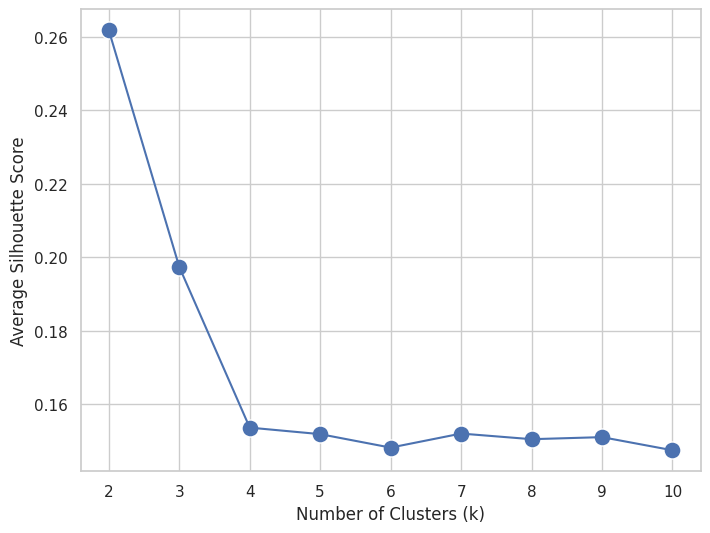

In [ ]:
numeric_columns = df_encoded.select_dtypes(include=['number'])

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(numeric_columns)  # Use numeric columns only
    silhouette.append(silhouette_score(numeric_columns, km.labels_))

silhouette_series = pd.Series(silhouette, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')
plt.show()

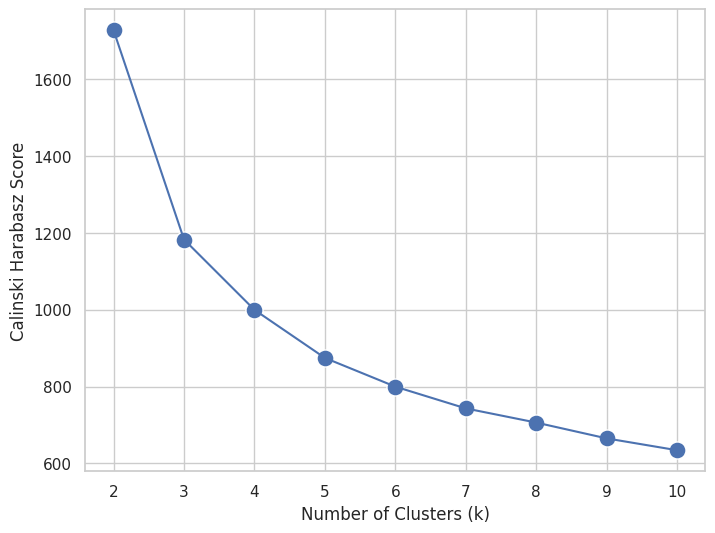

In [ ]:
numeric_columns = df_encoded.select_dtypes(include=['number'])

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(numeric_columns)  # Use numeric columns only
    calinski.append(calinski_harabasz_score(numeric_columns, km.labels_))

calinski_series = pd.Series(calinski, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=calinski_series, x=calinski_series.index)
ax = sns.scatterplot(y=calinski_series, x=calinski_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Calinski Harabasz Score')
plt.show()

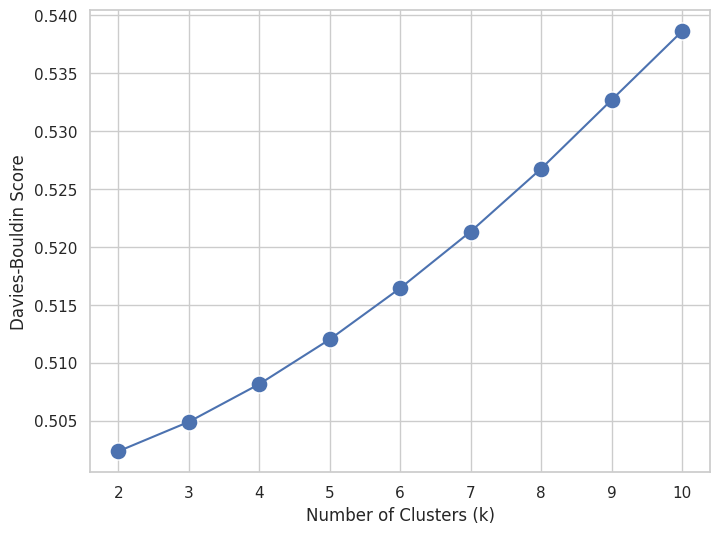

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

davies_bouldin = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(numeric_columns)  # Use numeric columns only
    davies_bouldin.append(davies_bouldin_score(numeric_columns, km.labels_))

davies_bouldin_series = pd.Series(davies_bouldin, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=davies_bouldin_series, x=davies_bouldin_series.index)
ax = sns.scatterplot(y=davies_bouldin_series, x=davies_bouldin_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Davies-Bouldin Score')
plt.show()

In [ ]:
km = KMeans(n_clusters=2, n_init = 25, random_state=1234)
km.fit(df_encoded)

KMeans(n_clusters=2, n_init=25, random_state=1234)

In [ ]:
simpleClusterInfo = pd.Series(km.labels_).value_counts().sort_index()
print(simpleClusterInfo)

0    1952
1    1948
dtype: int64


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   float64
 1   Gender                  3900 non-null   int64  
 2   Item Purchased          3900 non-null   int64  
 3   Category                3900 non-null   int64  
 4   Purchase Amount (USD)   3900 non-null   float64
 5   Location                3900 non-null   int64  
 6   Size                    3900 non-null   int64  
 7   Color                   3900 non-null   int64  
 8   Season                  3900 non-null   int64  
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   int64  
 11  Shipping Type           3900 non-null   int64  
 12  Discount Applied        3900 non-null   int64  
 13  Promo Code Used         3900 non-null   int64  
 14  Previous Purchases      3900 non-null   

In [ ]:
cluster_centers = pd.DataFrame(km.cluster_centers_)
print(cluster_centers)

          0         1          2         3          4          5         6   \
0  25.729744  0.677436  12.089231  0.981538  60.362051  24.736923  1.142051   
1  26.407179  0.682564  11.981538  1.022051  19.166667  23.795897  1.097949   

          7         8          9         10        11        12        13  \
0  12.101026  1.487179  12.794872  0.268205  2.495385  0.426154  0.426154   
1  12.117949  1.498462  12.204103  0.271795  2.533333  0.433846  0.433846   

          14        15        16        17        18        19  
0  24.621026  2.492308  2.946154  3.720513  1.696410  1.598462  
1  24.082051  2.532308  3.003590  3.713333  1.624615  1.567692  


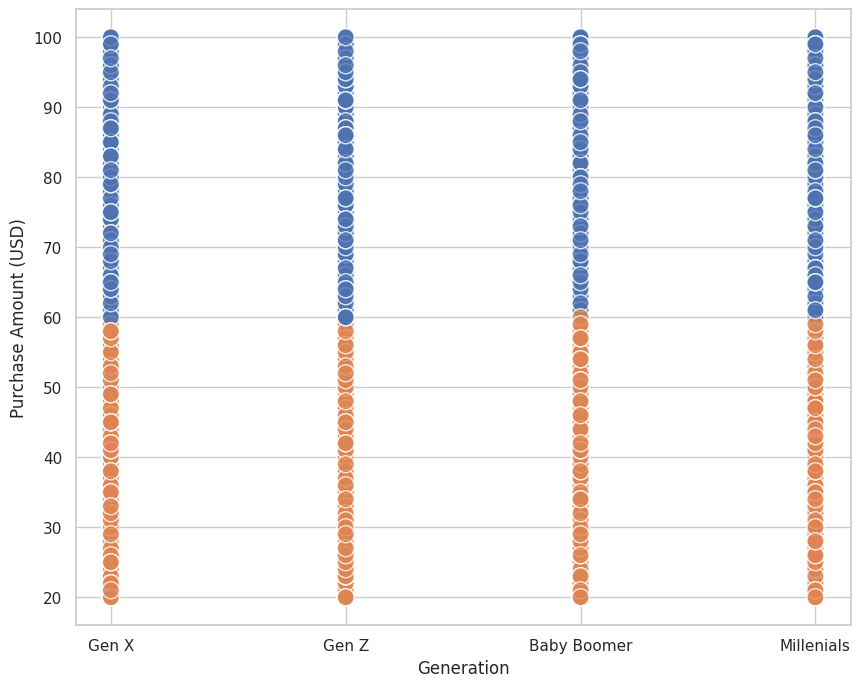

In [ ]:
plt.figure(figsize=(10, 8))


ax = sns.scatterplot(data = df,
                     x = 'Generation',
                     y = 'Purchase Amount (USD)',
                     hue = km.labels_,
                     palette = 'deep',
                     alpha = 0.8,
                     s = 150,
                     legend = False)

In [ ]:
df_encoded['Cluster'] = km.labels_.tolist()
df_encoded.tail(10)

Age  Item Purchased  Category  Purchase Amount (USD)  Location  Size  \
3890  17.0              16         1                   61.0        26     3   
3891  18.0               5         1                   10.0         5     0   
3892  17.0              12         0                   66.0        21     0   
3893   3.0               8         0                   44.0        20     0   
3894  48.0              19         1                   58.0         6     0   
3895  22.0               9         1                    8.0        45     0   
3896  34.0               0         0                   29.0        14     0   
3897  28.0               1         0                   13.0        29     0   
3898  26.0              17         2                   57.0        22     2   
3899  34.0               7         0                   61.0         4     1   

      Color  Season  Review Rating  Subscription Status  ...  Promo Code Used  \
3890      8       3            1.0                    0  ...                0   
3891     15       3           22.0                    0  ...                0   
3892      9       2           10.0                    0  ...                0   
3893     23       0            8.0                    0  ...                0   
3894     23       1           14.0                    0  ...                0   
3895     21       2           17.0                    0  ...                0   
3896     23       1           20.0                    0  ...                0   
3897      8       1            4.0                    0  ...                0   
3898      3       2           13.0                    0  ...                0   
3899      0       1            6.0                    0  ...                0   

      Previous Purchases  Payment Method  Frequency of Purchases  Region  \
3890                32.0               3                       0       4   
3891                 5.0               0                       5       5   
3892                 4.0               4                       3       1   
3893                28.0               0                       1       3   
3894                43.0               2                       2       3   
3895                31.0               5                       6       6   
3896                40.0               0                       1       4   
3897                23.0               5                       5       2   
3898                23.0               5                       6       4   
3899                32.0               5                       5       0   

      Age_group  Generation  Cluster  Gender_0  Gender_1  
3890          2           3        0         1         0  
3891          2           3        1         1         0  
3892          2           3        0         1         0  
3893          4           2        0         1         0  
3894          1           0        0         1         0  
3895          2           3        1         1         0  
3896          0           1        1         1         0  
3897          0           1        1         1         0  
3898          2           3        0         1         0  
3899          0           1        0         1         0  

[10 rows x 22 columns]

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns = ['Gender'])

KeyError: "None of [Index(['Gender'], dtype='object')] are in the [columns]"

In [ ]:
result = df_encoded.groupby('Cluster').agg({
    'Gender_0': 'mean',  # Assuming 0.0 corresponds to 'Female'
    'Gender_1': 'mean',  # Assuming 1.0 corresponds to 'Male'
    'Age': 'median',
    'Purchase Amount (USD)': 'median'  # Adjust the column name if needed
}).round(2)

print(result)

# Conclusion

# Invest in increasing the spending of the high earning low spending customers in cluster 1
# Keep the high earning, high spending customers happy in cluster 2
# keep an watchfuul eye on the low earning, high spending customers in cluster 3
# Invest in increasing the spending of the low earning, low spending customers in cluster 0

# The high earning, low spending customers in cluster 1 are the most profitable customers, so the company should invest in increasing the spending of the high earning low spending customers in cluster 1.

         Gender_0  Gender_1   Age  Purchase Amount (USD)
Cluster                                                 
0            0.32      0.68  26.0                   61.0
1            0.32      0.68  27.0                   19.0


# **Pickle**

In [299]:
import pickle

# save the model to disk
filename = 'final_model (All Features).pkl'
pickle.dump(km, open(filename, 'wb'))